# Convolution Implementation Visualisations
## Data import and formatting

In [47]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [48]:
dataframe = pd.read_csv("./ConvTimes.csv")
dataframe.fillna(0)

,# Threads,Serial,MPI,Pthreads,CUDA (1 blk),CUDA (2 blk),CUDA (4 blk),CUDA (8 blk)
0,1,2.48829,2.480580,2.568870,6.977220,0.000000,0.000000,0.000000
1,2,0.00000,1.286600,1.327650,3.617330,3.489650,0.000000,0.000000
2,3,0.00000,0.887549,0.886716,1.908850,0.000000,0.000000,0.000000
3,4,0.00000,0.669921,0.792072,1.572730,1.836300,1.754460,0.000000
4,5,0.00000,0.632343,0.707099,1.580160,0.000000,0.000000,0.000000
5,6,0.00000,0.600543,0.649860,1.328350,1.261040,0.000000,0.000000
6,7,0.00000,0.562903,0.606931,1.135500,0.000000,0.000000,0.000000
7,8,0.00000,0.551143,0.587207,1.017080,0.979043,0.920900,0.893831
8,10,0.00000,0.000000,0.582136,0.834294,0.806090,0.000000,0.000000
9,12,0.00000,0.000000,0.575142,0.726024,0.687501,0.638911,0.000000


In [56]:
# Adding speedup
dataframe["MPI Speedup"] = 2.48829 / dataframe["MPI"]
dataframe["Pthreads Speedup"] = 2.48829 / dataframe["Pthreads"]
dataframe["CUDA (1 blk) Speedup"] = 2.48829 / dataframe["CUDA (1 blk)"] 
dataframe["CUDA (2 blk) Speedup"] = 2.48829 / dataframe["CUDA (2 blk)"] 
dataframe["CUDA (4 blk) Speedup"] = 2.48829 / dataframe["CUDA (4 blk)"] 
dataframe["CUDA (8 blk) Speedup"] = 2.48829 / dataframe["CUDA (8 blk)"]
dataframe.fillna(0)

,# Threads,Serial,MPI,Pthreads,CUDA (1 blk),CUDA (2 blk),CUDA (4 blk),CUDA (8 blk),MPI Speedup,Pthreads Speedup,CUDA (1 blk) Speedup,CUDA (2 blk) Speedup,CUDA (4 blk) Speedup,CUDA (8 blk) Speedup,MPI Eff,Pthreads Eff,CUDA (1 blk) Eff,CUDA (2 blk) Eff,CUDA (4 blk) Eff,CUDA (8 blk) Eff
0,1,2.48829,2.480580,2.568870,6.977220,0.000000,0.000000,0.000000,1.003108,0.968632,0.356631,0.000000,0.000000,0.000000,0.996901,1.032384,2.804022,0.000000,0.000000,0.000000
1,2,0.00000,1.286600,1.327650,3.617330,3.489650,0.000000,0.000000,1.934004,1.874206,0.687880,0.713049,0.000000,0.000000,0.258531,0.266780,0.726871,0.701214,0.000000,0.000000
2,3,0.00000,0.887549,0.886716,1.908850,0.000000,0.000000,0.000000,2.803552,2.806186,1.303554,0.000000,0.000000,0.000000,0.118897,0.118785,0.255711,0.000000,0.000000,0.000000
3,4,0.00000,0.669921,0.792072,1.572730,1.836300,1.754460,0.000000,3.714304,3.141495,1.582147,1.355056,1.418265,0.000000,0.067307,0.079580,0.158013,0.184494,0.176272,0.000000
4,5,0.00000,0.632343,0.707099,1.580160,0.000000,0.000000,0.000000,3.935032,3.519012,1.574708,0.000000,0.000000,0.000000,0.050826,0.056834,0.127008,0.000000,0.000000,0.000000
5,6,0.00000,0.600543,0.649860,1.328350,1.261040,0.000000,0.000000,4.143400,3.828963,1.873219,1.973205,0.000000,0.000000,0.040225,0.043528,0.088973,0.084465,0.000000,0.000000
6,7,0.00000,0.562903,0.606931,1.135500,0.000000,0.000000,0.000000,4.420460,4.099791,2.191361,0.000000,0.000000,0.000000,0.032317,0.034845,0.065191,0.000000,0.000000,0.000000
7,8,0.00000,0.551143,0.587207,1.017080,0.979043,0.920900,0.893831,4.514781,4.237501,2.446504,2.541553,2.702020,2.783848,0.027687,0.029499,0.051093,0.049183,0.046262,0.044902
8,10,0.00000,0.000000,0.582136,0.834294,0.806090,0.000000,0.000000,0.000000,4.274414,2.982510,3.086864,0.000000,0.000000,0.000000,0.023395,0.033529,0.032395,0.000000,0.000000
9,12,0.00000,0.000000,0.575142,0.726024,0.687501,0.638911,0.000000,0.000000,4.326392,3.427283,3.619326,3.894580,0.000000,0.000000,0.019262,0.024315,0.023025,0.021397,0.000000


In [57]:
# Adding efficiency
dataframe["MPI Eff"] = dataframe["MPI Speedup"] / dataframe["# Threads"]
dataframe["Pthreads Eff"] = dataframe["Pthreads Speedup"] / dataframe["# Threads"]
dataframe["CUDA (1 blk) Eff"] = dataframe["CUDA (1 blk) Speedup"] / dataframe["# Threads"]
dataframe["CUDA (2 blk) Eff"] = dataframe["CUDA (2 blk) Speedup"] / dataframe["# Threads"]
dataframe["CUDA (4 blk) Eff"] = dataframe["CUDA (4 blk) Speedup"] / dataframe["# Threads"]
dataframe["CUDA (8 blk) Eff"] = dataframe["CUDA (8 blk) Speedup"] / dataframe["# Threads"]
dataframe.fillna(0)

,# Threads,Serial,MPI,Pthreads,CUDA (1 blk),CUDA (2 blk),CUDA (4 blk),CUDA (8 blk),MPI Speedup,Pthreads Speedup,CUDA (1 blk) Speedup,CUDA (2 blk) Speedup,CUDA (4 blk) Speedup,CUDA (8 blk) Speedup,MPI Eff,Pthreads Eff,CUDA (1 blk) Eff,CUDA (2 blk) Eff,CUDA (4 blk) Eff,CUDA (8 blk) Eff
0,1,2.48829,2.480580,2.568870,6.977220,0.000000,0.000000,0.000000,1.003108,0.968632,0.356631,0.000000,0.000000,0.000000,1.003108,0.968632,0.356631,0.000000,0.000000,0.000000
1,2,0.00000,1.286600,1.327650,3.617330,3.489650,0.000000,0.000000,1.934004,1.874206,0.687880,0.713049,0.000000,0.000000,0.967002,0.937103,0.343940,0.356524,0.000000,0.000000
2,3,0.00000,0.887549,0.886716,1.908850,0.000000,0.000000,0.000000,2.803552,2.806186,1.303554,0.000000,0.000000,0.000000,0.934517,0.935395,0.434518,0.000000,0.000000,0.000000
3,4,0.00000,0.669921,0.792072,1.572730,1.836300,1.754460,0.000000,3.714304,3.141495,1.582147,1.355056,1.418265,0.000000,0.928576,0.785374,0.395537,0.338764,0.354566,0.000000
4,5,0.00000,0.632343,0.707099,1.580160,0.000000,0.000000,0.000000,3.935032,3.519012,1.574708,0.000000,0.000000,0.000000,0.787006,0.703802,0.314942,0.000000,0.000000,0.000000
5,6,0.00000,0.600543,0.649860,1.328350,1.261040,0.000000,0.000000,4.143400,3.828963,1.873219,1.973205,0.000000,0.000000,0.690567,0.638161,0.312203,0.328867,0.000000,0.000000
6,7,0.00000,0.562903,0.606931,1.135500,0.000000,0.000000,0.000000,4.420460,4.099791,2.191361,0.000000,0.000000,0.000000,0.631494,0.585684,0.313052,0.000000,0.000000,0.000000
7,8,0.00000,0.551143,0.587207,1.017080,0.979043,0.920900,0.893831,4.514781,4.237501,2.446504,2.541553,2.702020,2.783848,0.564348,0.529688,0.305813,0.317694,0.337752,0.347981
8,10,0.00000,0.000000,0.582136,0.834294,0.806090,0.000000,0.000000,0.000000,4.274414,2.982510,3.086864,0.000000,0.000000,0.000000,0.427441,0.298251,0.308686,0.000000,0.000000
9,12,0.00000,0.000000,0.575142,0.726024,0.687501,0.638911,0.000000,0.000000,4.326392,3.427283,3.619326,3.894580,0.000000,0.000000,0.360533,0.285607,0.301610,0.324548,0.000000


In [90]:
# Rounding
dataframe = dataframe.round({"MPI Speedup": 4, "Pthreads Speedup": 4, "CUDA (1 blk) Speedup": 4,
                "CUDA (2 blk) Speedup": 4, "CUDA (4 blk) Speedup": 4,
                "CUDA (8 blk) Speedup": 4})
dataframe = dataframe.round({"MPI Eff": 4, "Pthreads Eff": 4, "CUDA (1 blk) Eff": 4,
                "CUDA (2 blk) Eff": 4, "CUDA (4 blk) Eff": 4,
                "CUDA (8 blk) Eff": 4})

In [91]:
# Writting to csv
dataframe.to_csv("ConvSU.csv", columns= ["# Threads", 
                "MPI Speedup", "Pthreads Speedup", "CUDA (1 blk) Speedup",
                "CUDA (2 blk) Speedup", "CUDA (4 blk) Speedup",
                "CUDA (8 blk) Speedup"])
dataframe.to_csv("ConvEff.csv", columns= ["# Threads", 
                "MPI Eff", "Pthreads Eff", "CUDA (1 blk) Eff",
                "CUDA (2 blk) Eff", "CUDA (4 blk) Eff",
                "CUDA (8 blk) Eff"])

In [80]:
data_labels = ["# Threads", "Serial", 
                "MPI", "Pthreads", "CUDA (1 blk)",
                "CUDA (2 blk)", "CUDA (4 blk)",
                "CUDA (8 blk)"]

thread_num = dataframe[data_labels[0]].to_numpy()
lin_imp = dataframe[data_labels[1]].to_numpy()[0] # Float, not list
MPI_imp = dataframe[data_labels[2]].to_numpy()
pth_imp = dataframe[data_labels[3]].to_numpy()
cd1blk_imp = dataframe[data_labels[4]].to_numpy()
cd2blk_imp = dataframe[data_labels[5]].to_numpy()
cd4blk_imp = dataframe[data_labels[6]].to_numpy()
cd8blk_imp = dataframe[data_labels[7]].to_numpy()

plt.rcParams['text.usetex'] = False


## Data Visualization
Individual results (compared to linear implementation as baseline)

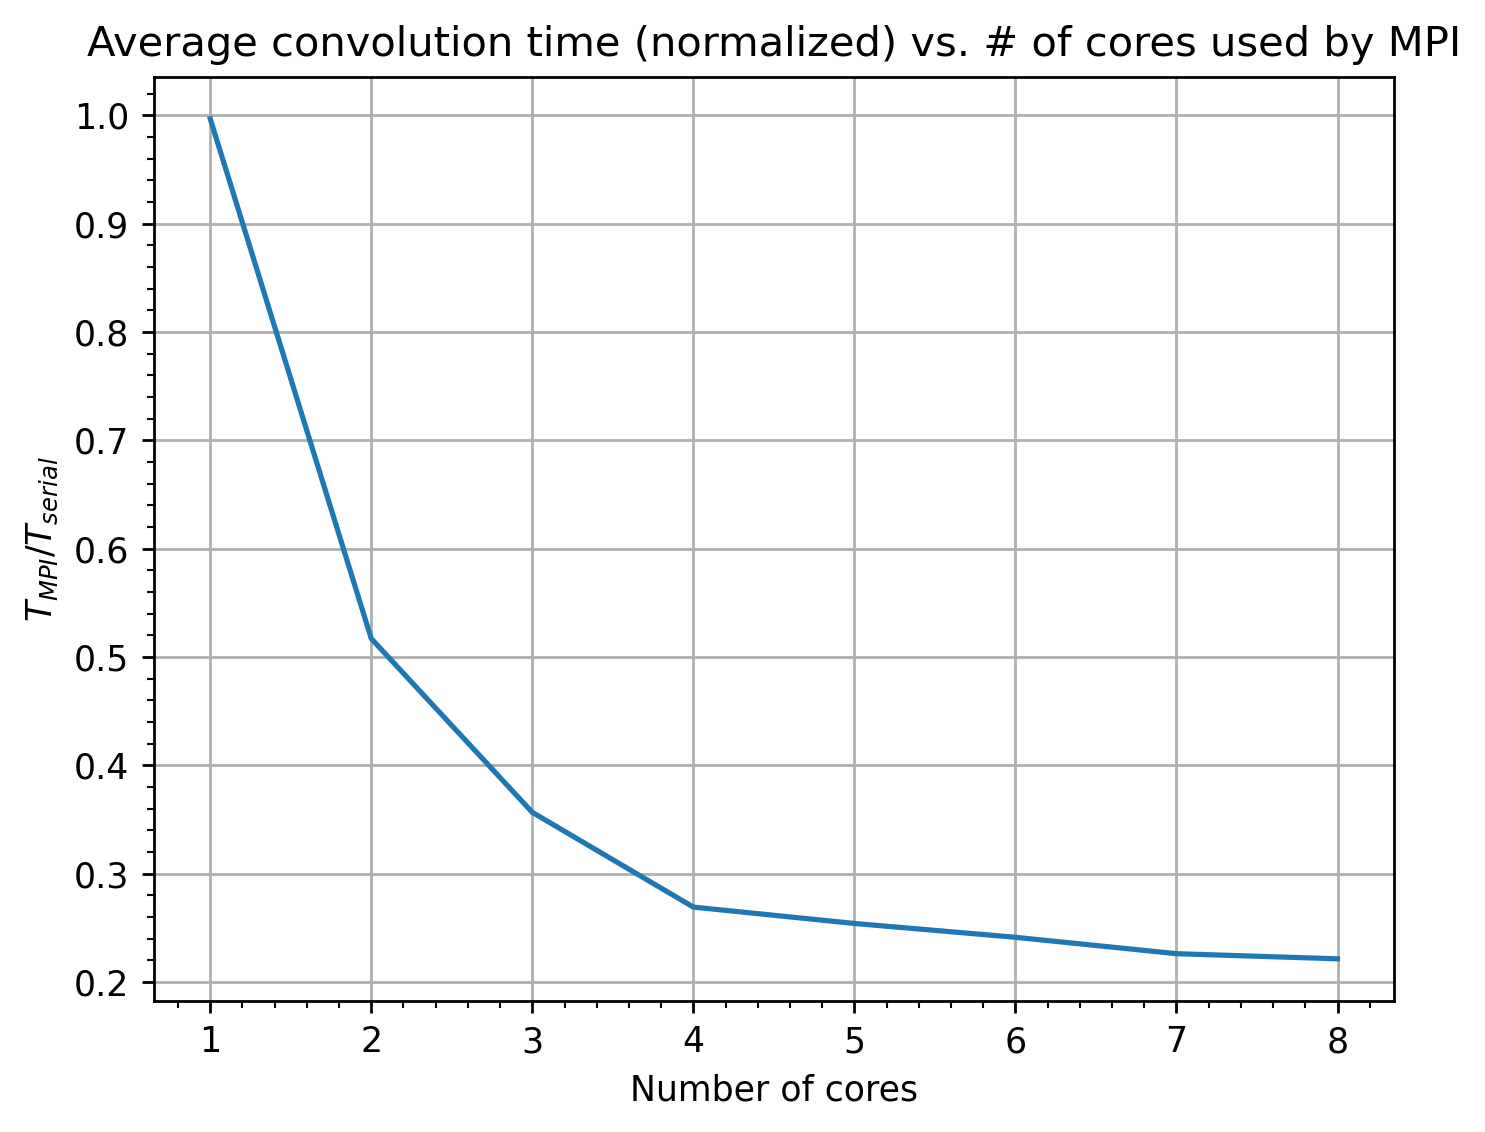

In [12]:
fig0, ax0 = plt.subplots()
fig0.dpi = 250
ax0.plot(thread_num[~np.isnan(MPI_imp)], MPI_imp[~np.isnan(MPI_imp)]/lin_imp)
# ax0.plot(thread_num[~np.isnan(MPI_imp)], [lin_imp]*len(MPI_imp[~np.isnan(MPI_imp)]))
ax0.grid()
ax0.set_xlabel(r"Number of cores")
ax0.set_ylabel(r"$T_{MPI}/T_{serial}$")
ax0.set_title(r"Average convolution time (normalized) vs. # of cores used by MPI")
ax0.minorticks_on()

Text(0.5, 1.0, 'Speedup vs. # of cores used by MPI')

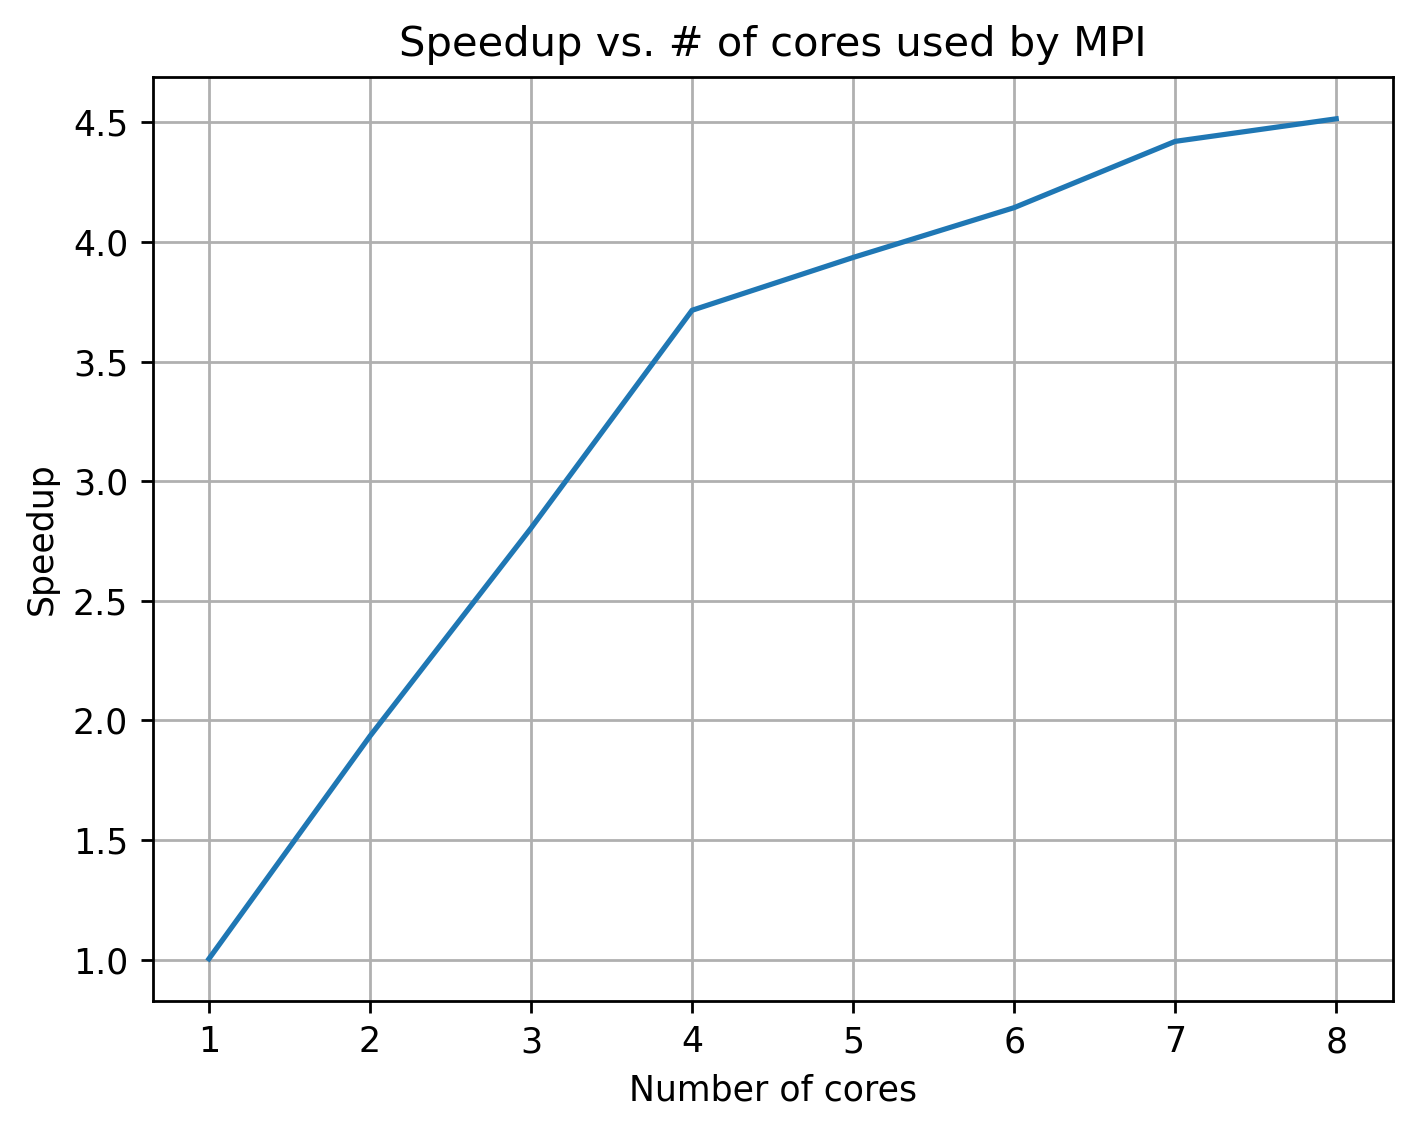

In [92]:
# Speed up
fig0, ax0 = plt.subplots()
fig0.dpi = 250
ax0.plot(thread_num[~np.isnan(MPI_imp)], lin_imp/MPI_imp[~np.isnan(MPI_imp)])
# ax0.plot(thread_num[~np.isnan(MPI_imp)], [lin_imp]*len(MPI_imp[~np.isnan(MPI_imp)]))
ax0.grid()
ax0.set_xlabel(r"Number of cores")
ax0.set_ylabel(r"Speedup")
ax0.set_title(r"Speedup vs. # of cores used by MPI")

Text(0.5, 1.0, 'Efficiency vs. # of cores used by MPI')

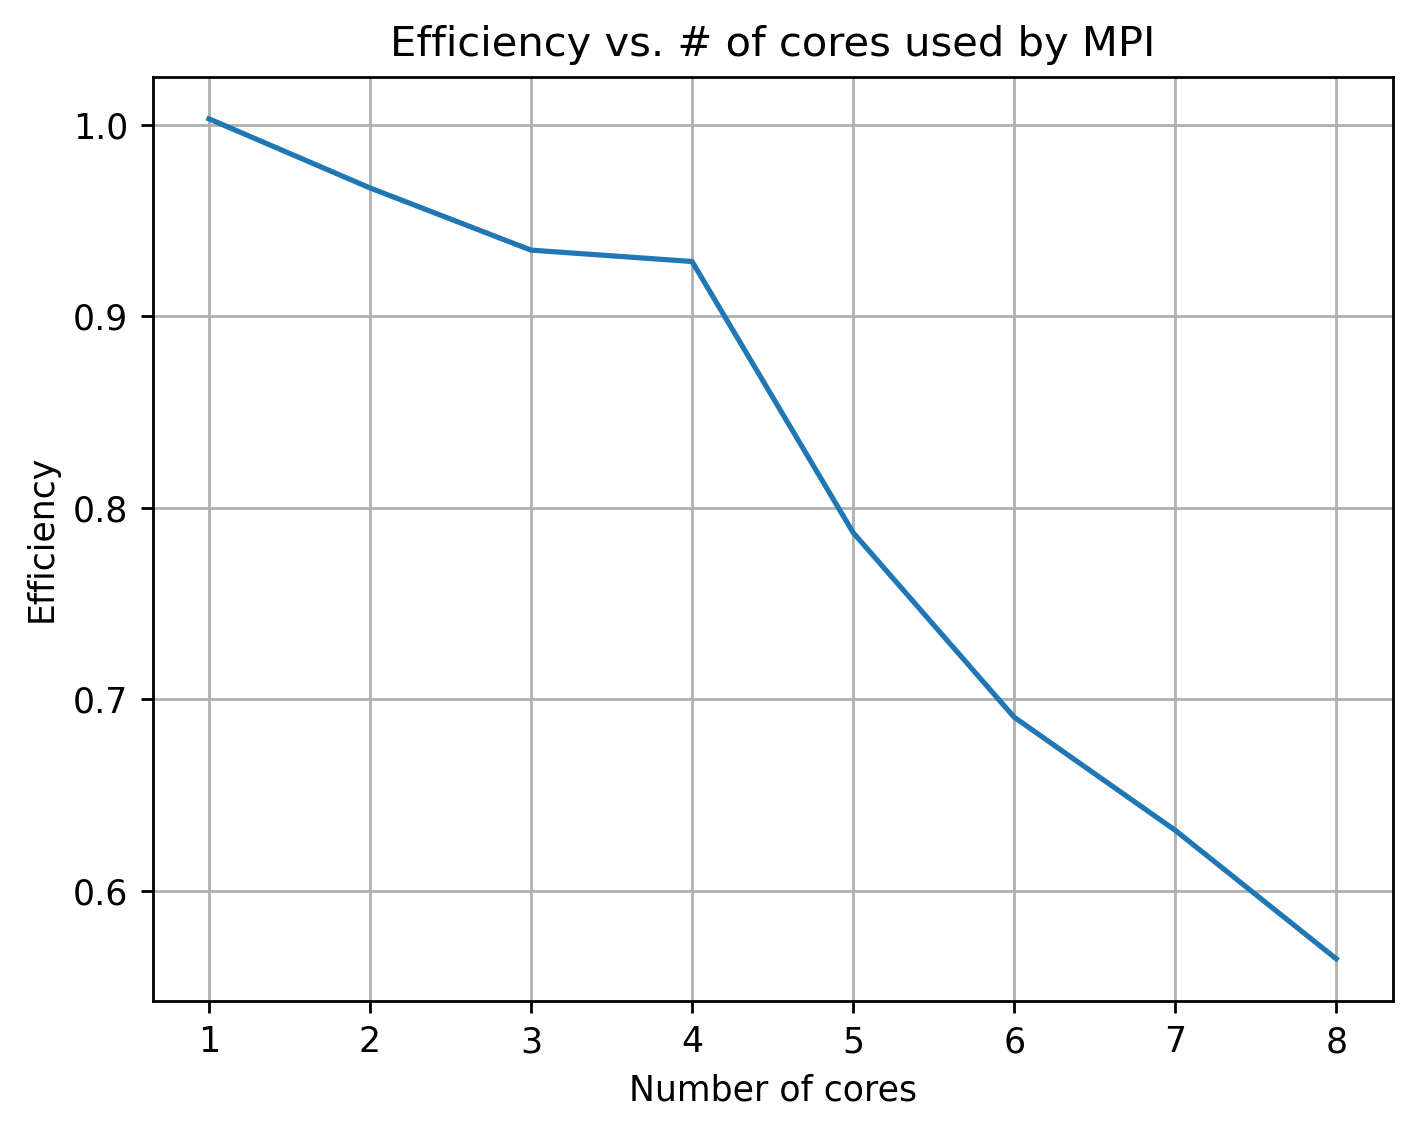

In [7]:
# Efficiency
fig0, ax0 = plt.subplots()
fig0.dpi = 250
ax0.plot(thread_num[~np.isnan(MPI_imp)], lin_imp/(MPI_imp[~np.isnan(MPI_imp)] * thread_num[~np.isnan(MPI_imp)]))
# ax0.plot(thread_num[~np.isnan(MPI_imp)], [lin_imp]*len(MPI_imp[~np.isnan(MPI_imp)]))
ax0.grid()
ax0.set_xlabel(r"Number of cores")
ax0.set_ylabel(r"Efficiency")
ax0.set_title(r"Efficiency vs. # of cores used by MPI")

Text(0.5, 1.0, 'Average convolution time (normalized) vs. # of threads used by Pthreads')

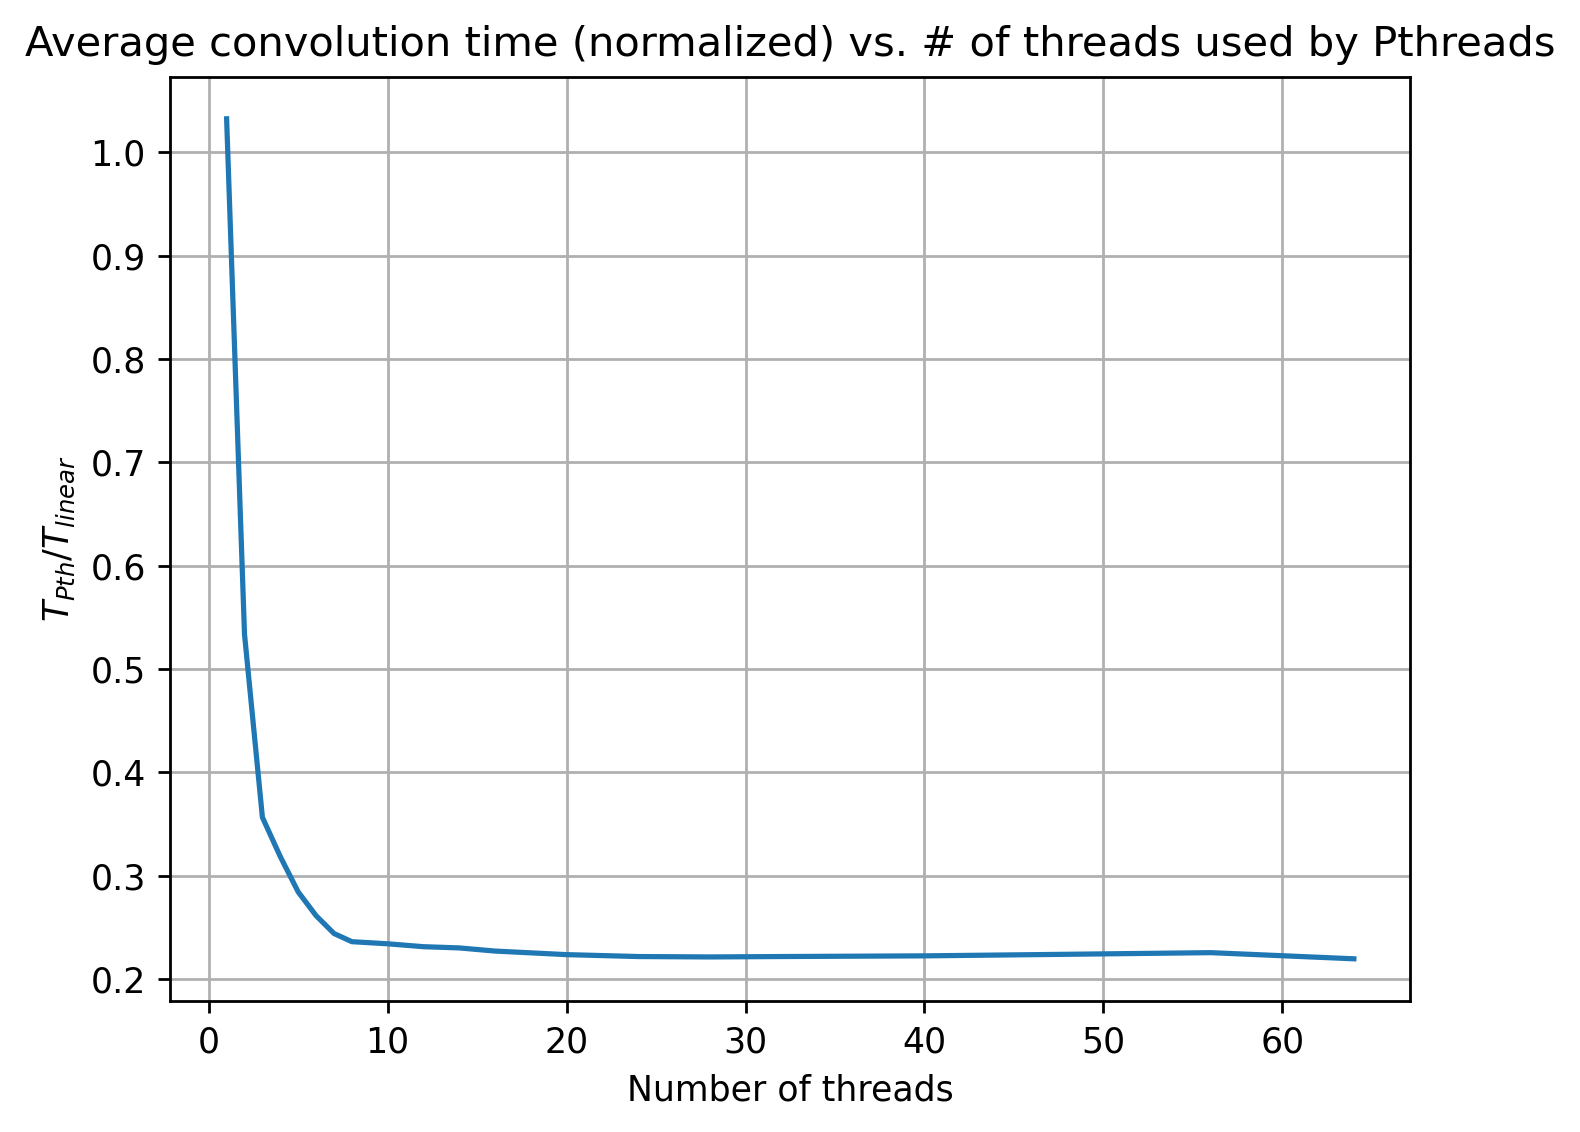

In [34]:
fig1, ax1 = plt.subplots()
fig1.dpi = 250
ax1.plot(thread_num[~np.isnan(pth_imp)], pth_imp[~np.isnan(pth_imp)]/lin_imp)
# ax1.plot(thread_num[~np.isnan(pth_imp)], [lin_imp]*len(pth_imp[~np.isnan(pth_imp)]))
ax1.grid()
ax1.set_xlabel(r"Number of threads")
ax1.set_ylabel(r"$T_{Pth}/T_{linear}$")
ax1.set_title(r"Average convolution time (normalized) vs. # of threads used by Pthreads")

Text(0.5, 1.0, 'Speedup vs. # of threads used by Pthreads')

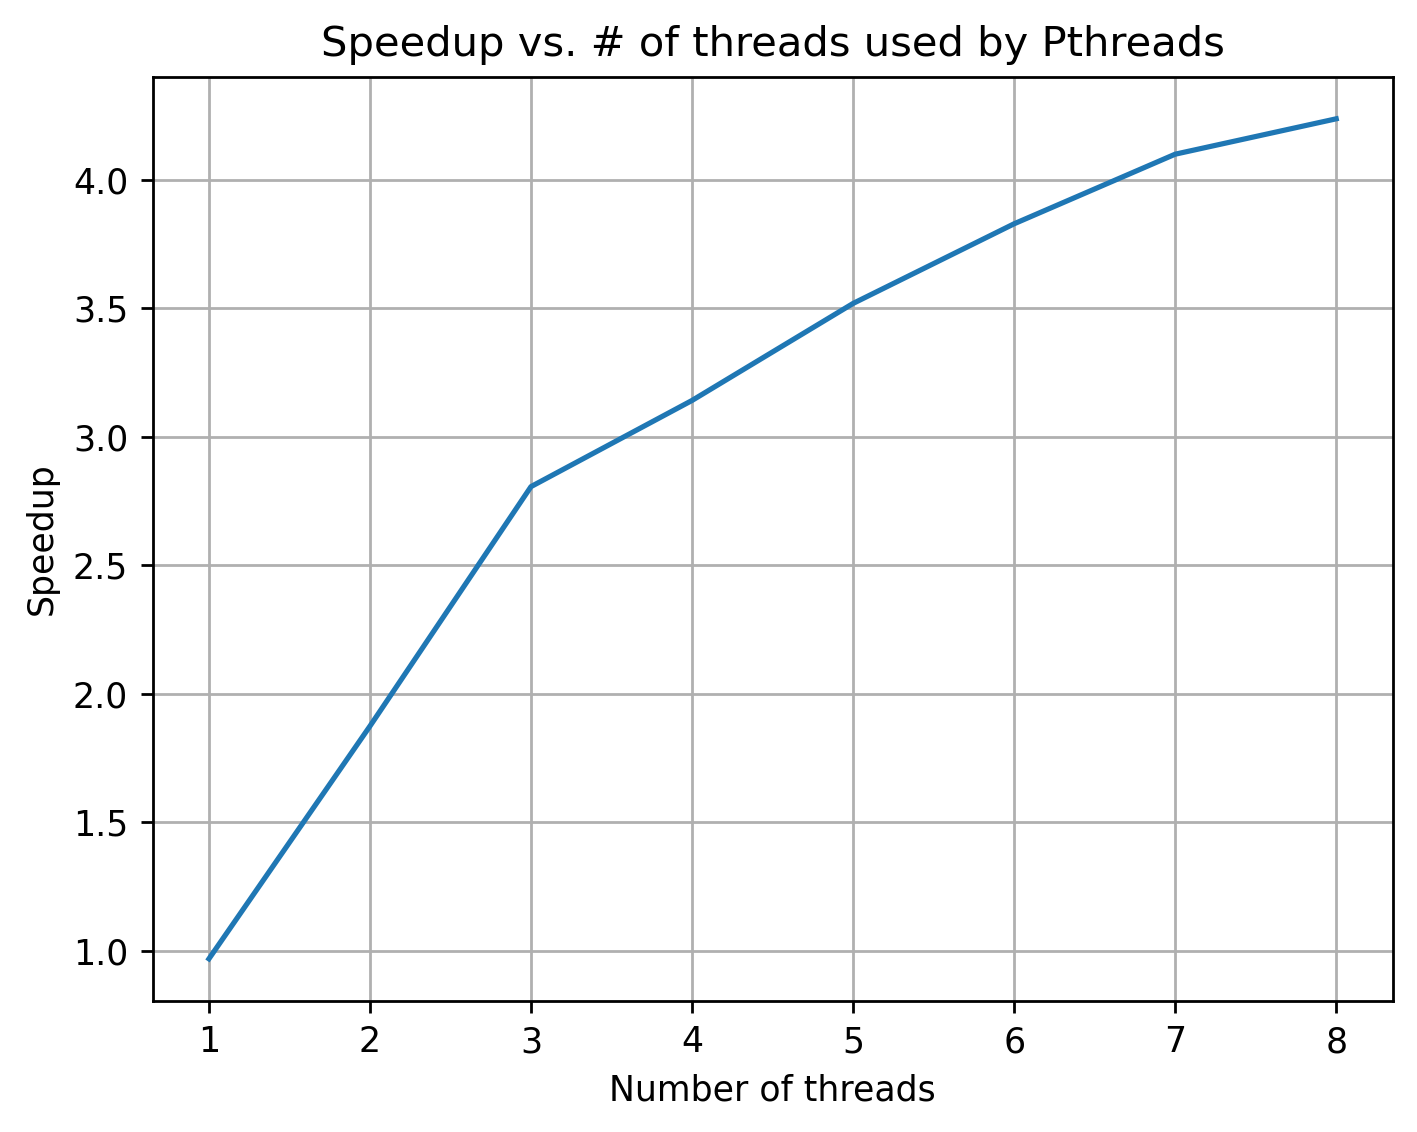

In [14]:
# Speed up
fig0, ax0 = plt.subplots()
fig0.dpi = 250
ax0.plot(thread_num[~np.isnan(MPI_imp)], lin_imp/pth_imp[~np.isnan(MPI_imp)])
# ax0.plot(thread_num[~np.isnan(MPI_imp)], [lin_imp]*len(MPI_imp[~np.isnan(MPI_imp)]))
ax0.grid()
ax0.set_xlabel(r"Number of threads")
ax0.set_ylabel(r"Speedup")
ax0.set_title(r"Speedup vs. # of threads used by Pthreads")

Text(0.5, 1.0, 'Efficiency vs. # of threads used by Pthreads')

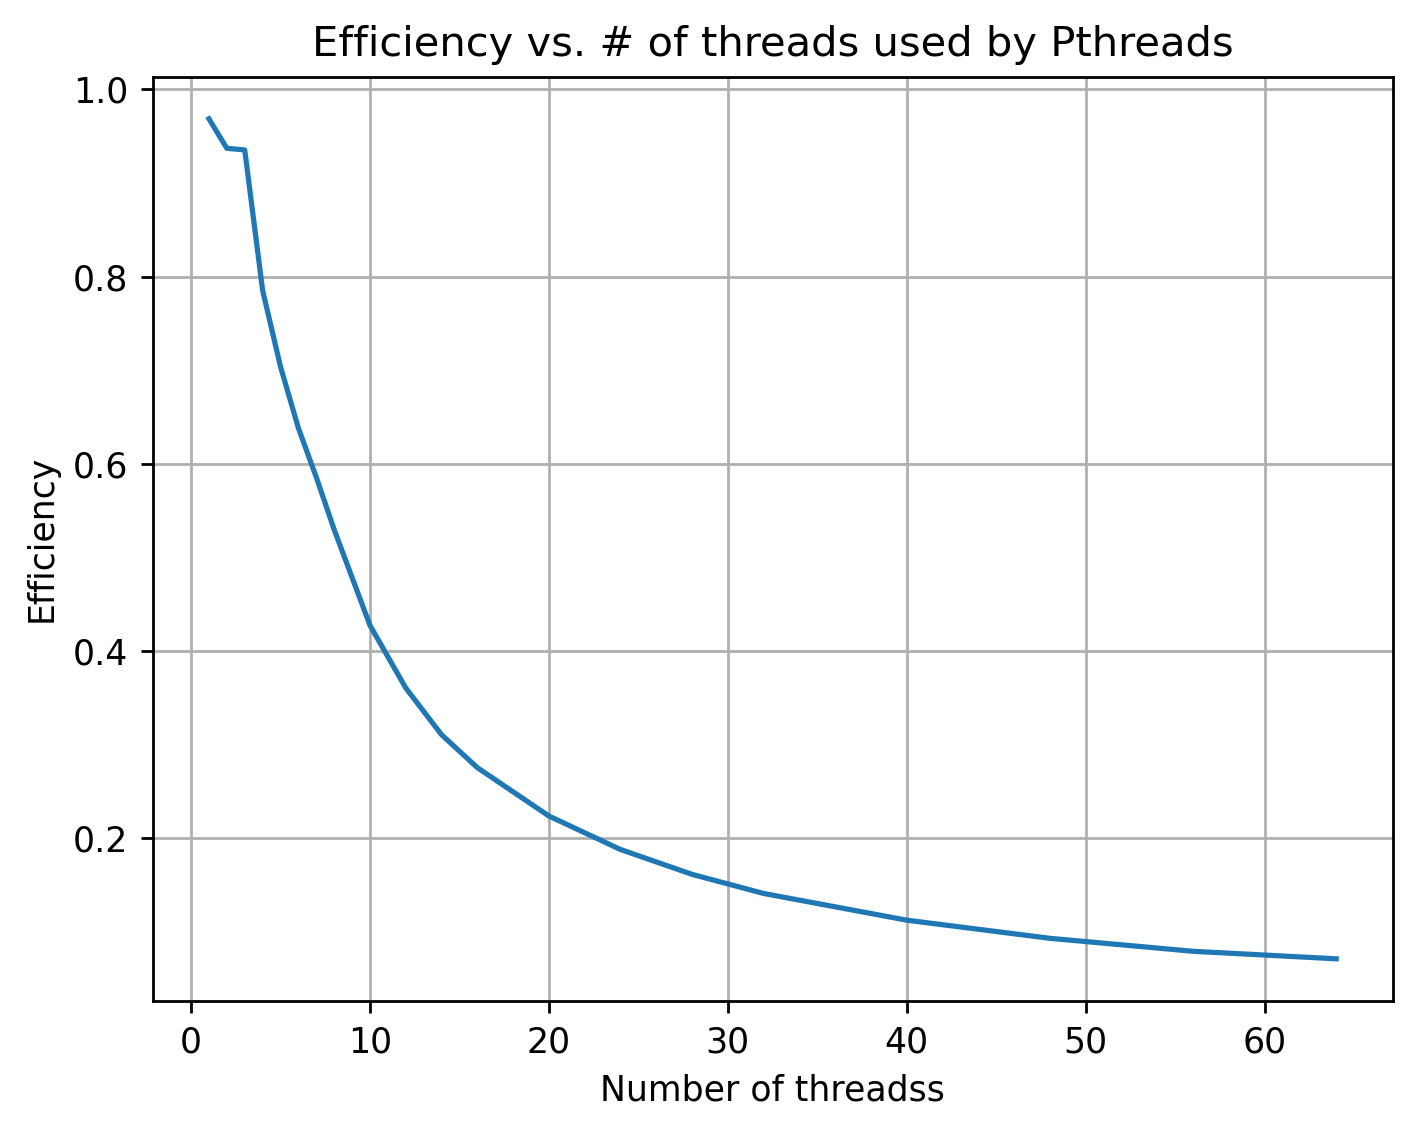

In [16]:
# Speed up
fig0, ax0 = plt.subplots()
fig0.dpi = 250
ax0.plot(thread_num[~np.isnan(pth_imp)], lin_imp/(pth_imp[~np.isnan(pth_imp)]*thread_num[~np.isnan(pth_imp)]))
ax0.grid()
ax0.set_xlabel(r"Number of threads")
ax0.set_ylabel(r"Efficiency")
ax0.set_title(r"Efficiency vs. # of threads used by Pthreads")

Text(0.5, 1.0, 'Average convolution time (normalized) vs. # of SPs (1 block)')

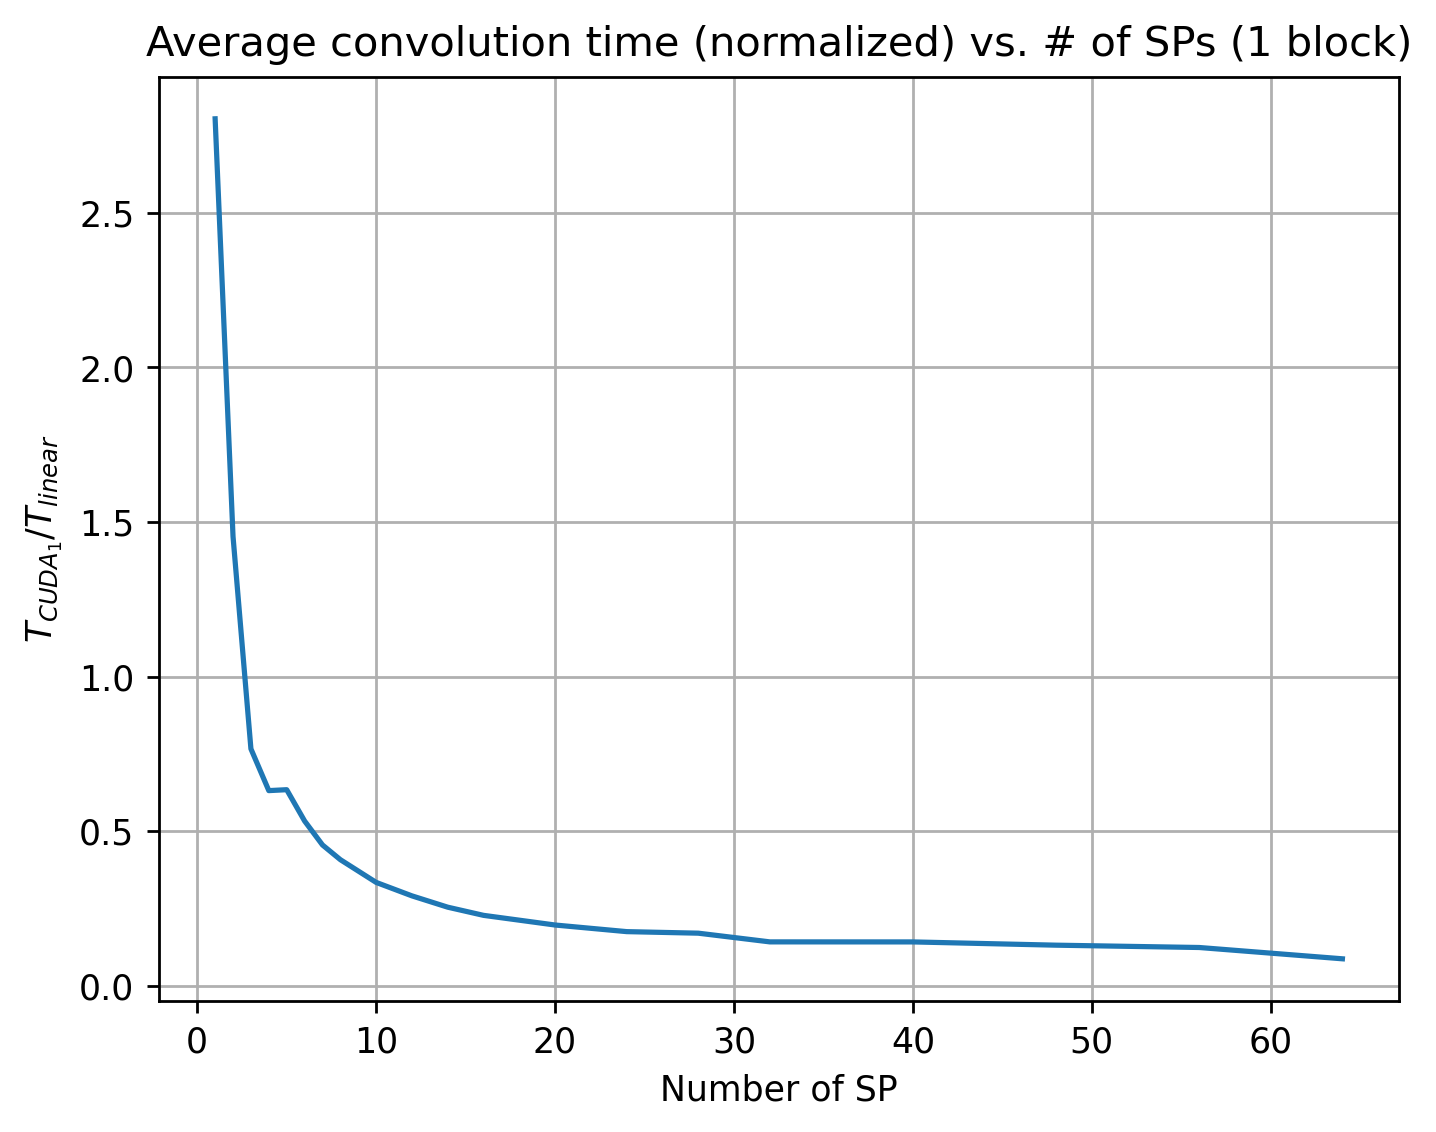

In [33]:
fig2, ax2 = plt.subplots()
fig2.dpi = 250
ax2.plot(thread_num[~np.isnan(cd1blk_imp)], cd1blk_imp[~np.isnan(cd1blk_imp)]/lin_imp)
# ax2.plot(thread_num[~np.isnan(cd1blk_imp)], [lin_imp]*len(cd1blk_imp[~np.isnan(cd1blk_imp)]))
ax2.grid()
ax2.set_xlabel(r"Number of SP")
ax2.set_ylabel(r"$T_{CUDA_1}/T_{linear}$")
ax2.set_title(r"Average convolution time (normalized) vs. # of SPs (1 block)")

Text(0.5, 1.0, 'Speedup vs. # of SPs (1 block)')

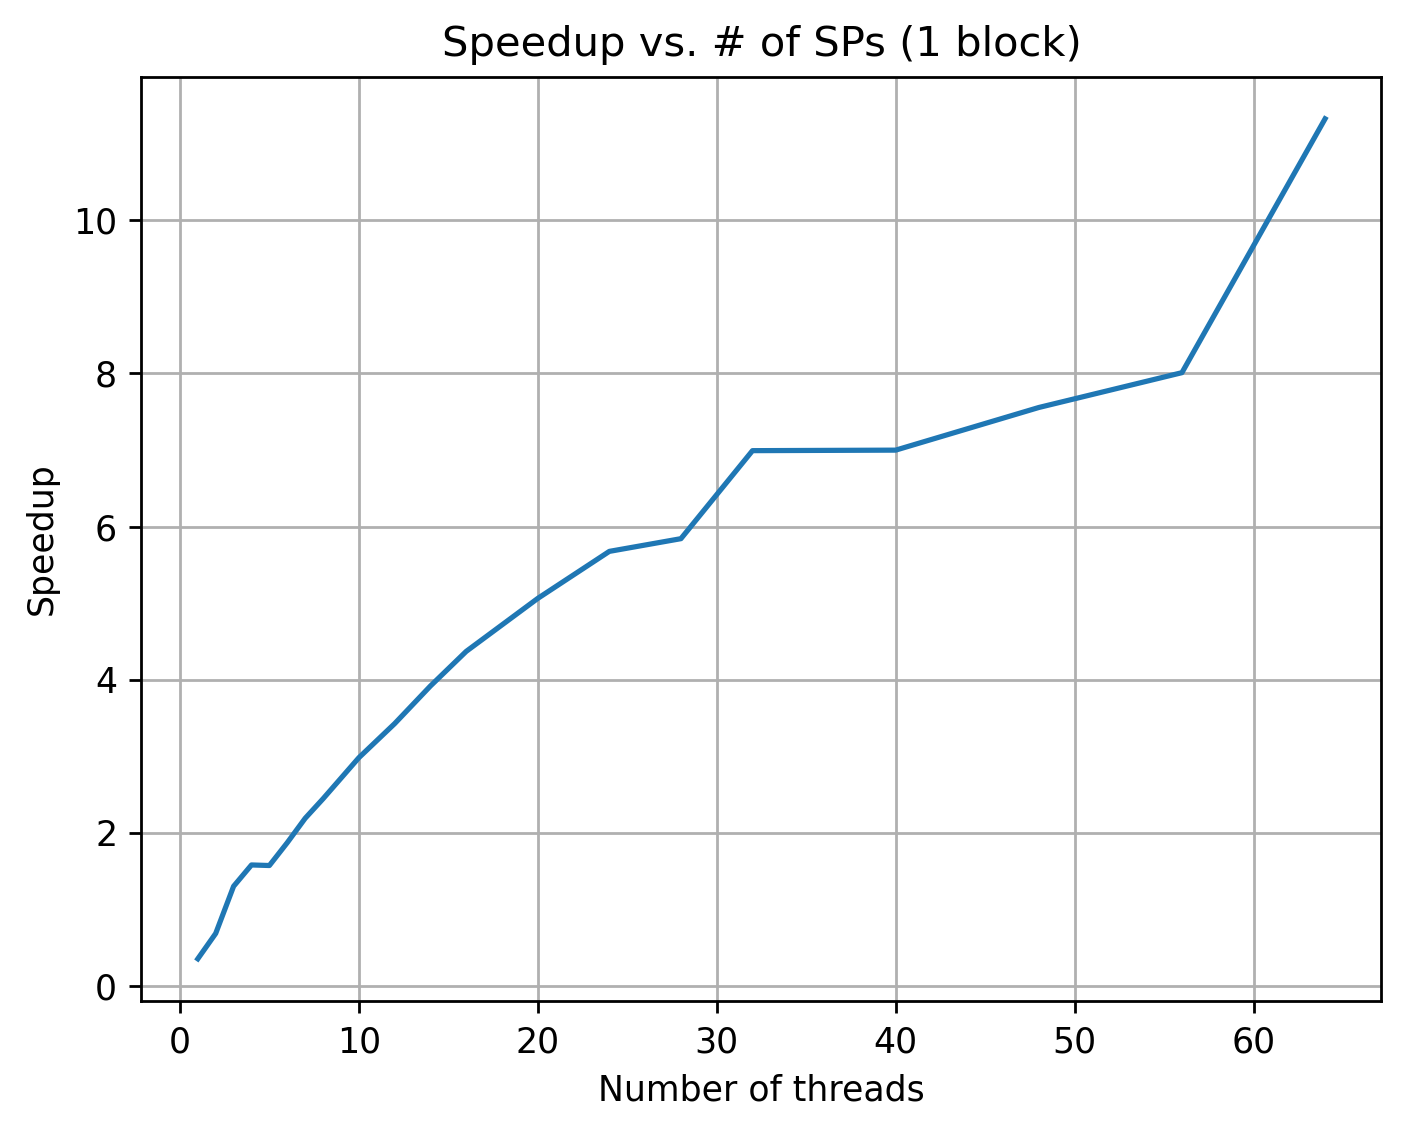

In [26]:
# Speedup
fig0, ax0 = plt.subplots()
fig0.dpi = 250
ax0.plot(thread_num[~np.isnan(cd1blk_imp)], lin_imp/(cd1blk_imp[~np.isnan(cd1blk_imp)]))
ax0.grid()
ax0.set_xlabel(r"Number of threads")
ax0.set_ylabel(r"Speedup")
ax0.set_title(r"Speedup vs. # of SPs (1 block)")

Text(0.5, 1.0, 'Efficiency vs. # of SPs (1 block)')

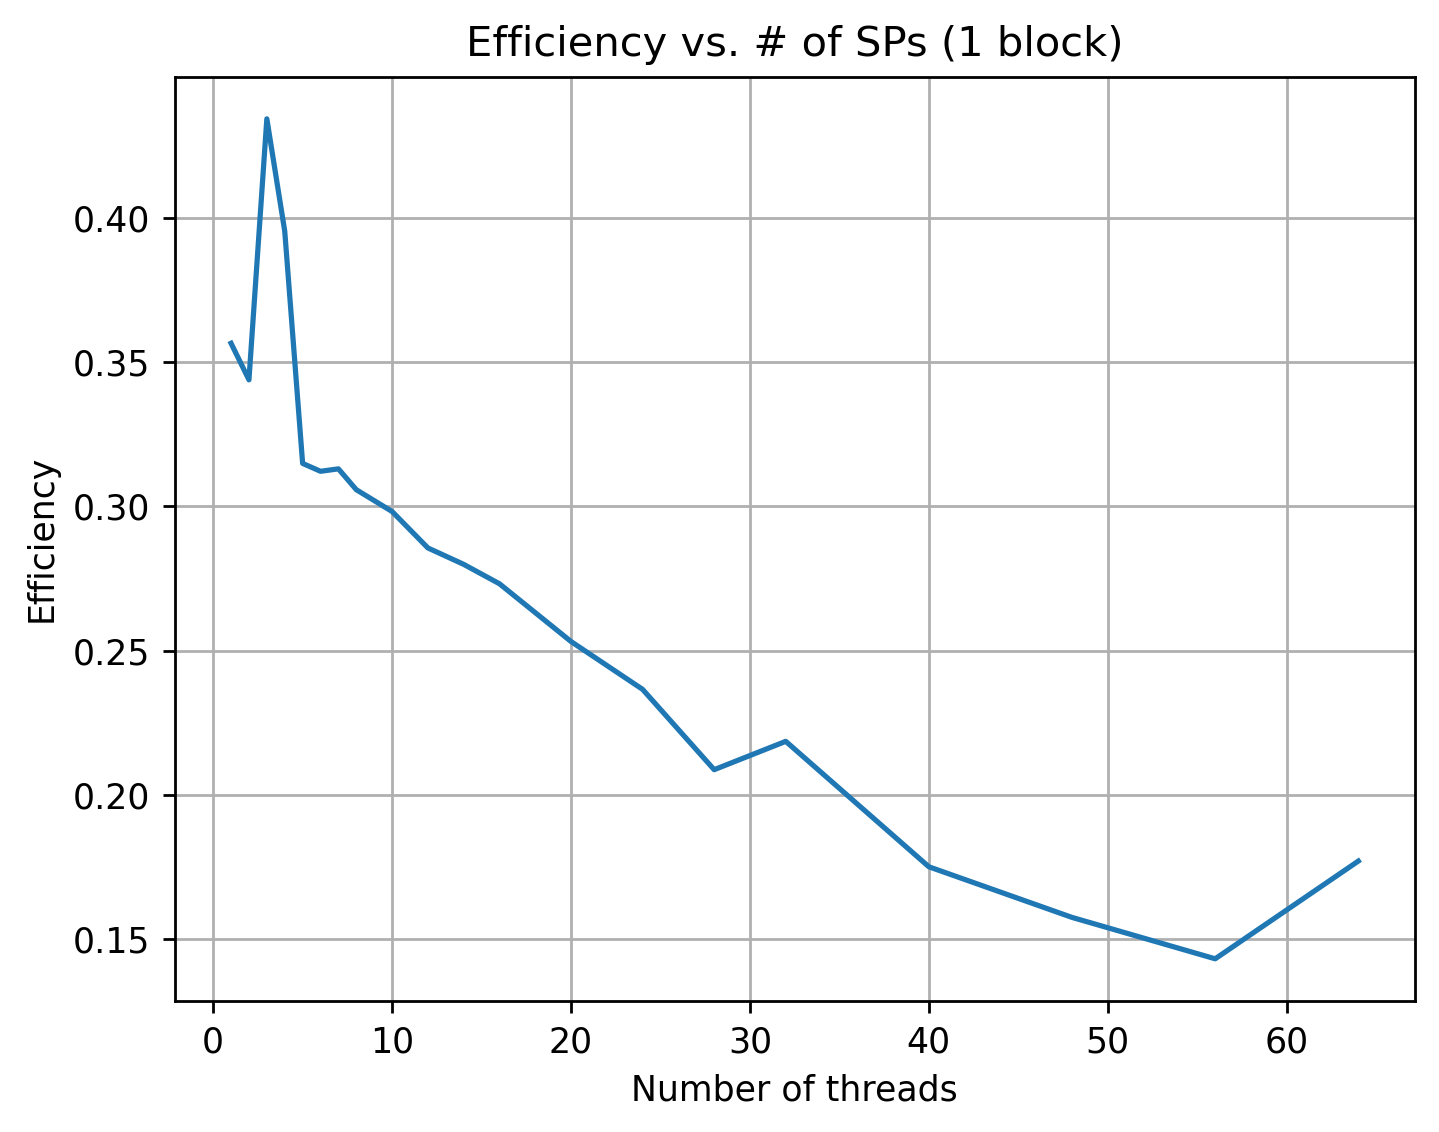

In [24]:
# Efficiency
fig0, ax0 = plt.subplots()
fig0.dpi = 250
ax0.plot(thread_num[~np.isnan(cd1blk_imp)], lin_imp/((cd1blk_imp[~np.isnan(cd1blk_imp)])*thread_num[~np.isnan(cd1blk_imp)]))
ax0.grid()
ax0.set_xlabel(r"Number of threads")
ax0.set_ylabel(r"Efficiency")
ax0.set_title(r"Efficiency vs. # of SPs (1 block)")

Text(0.5, 1.0, 'Average convolution time (normalized) vs. # of SPs (2 block)')

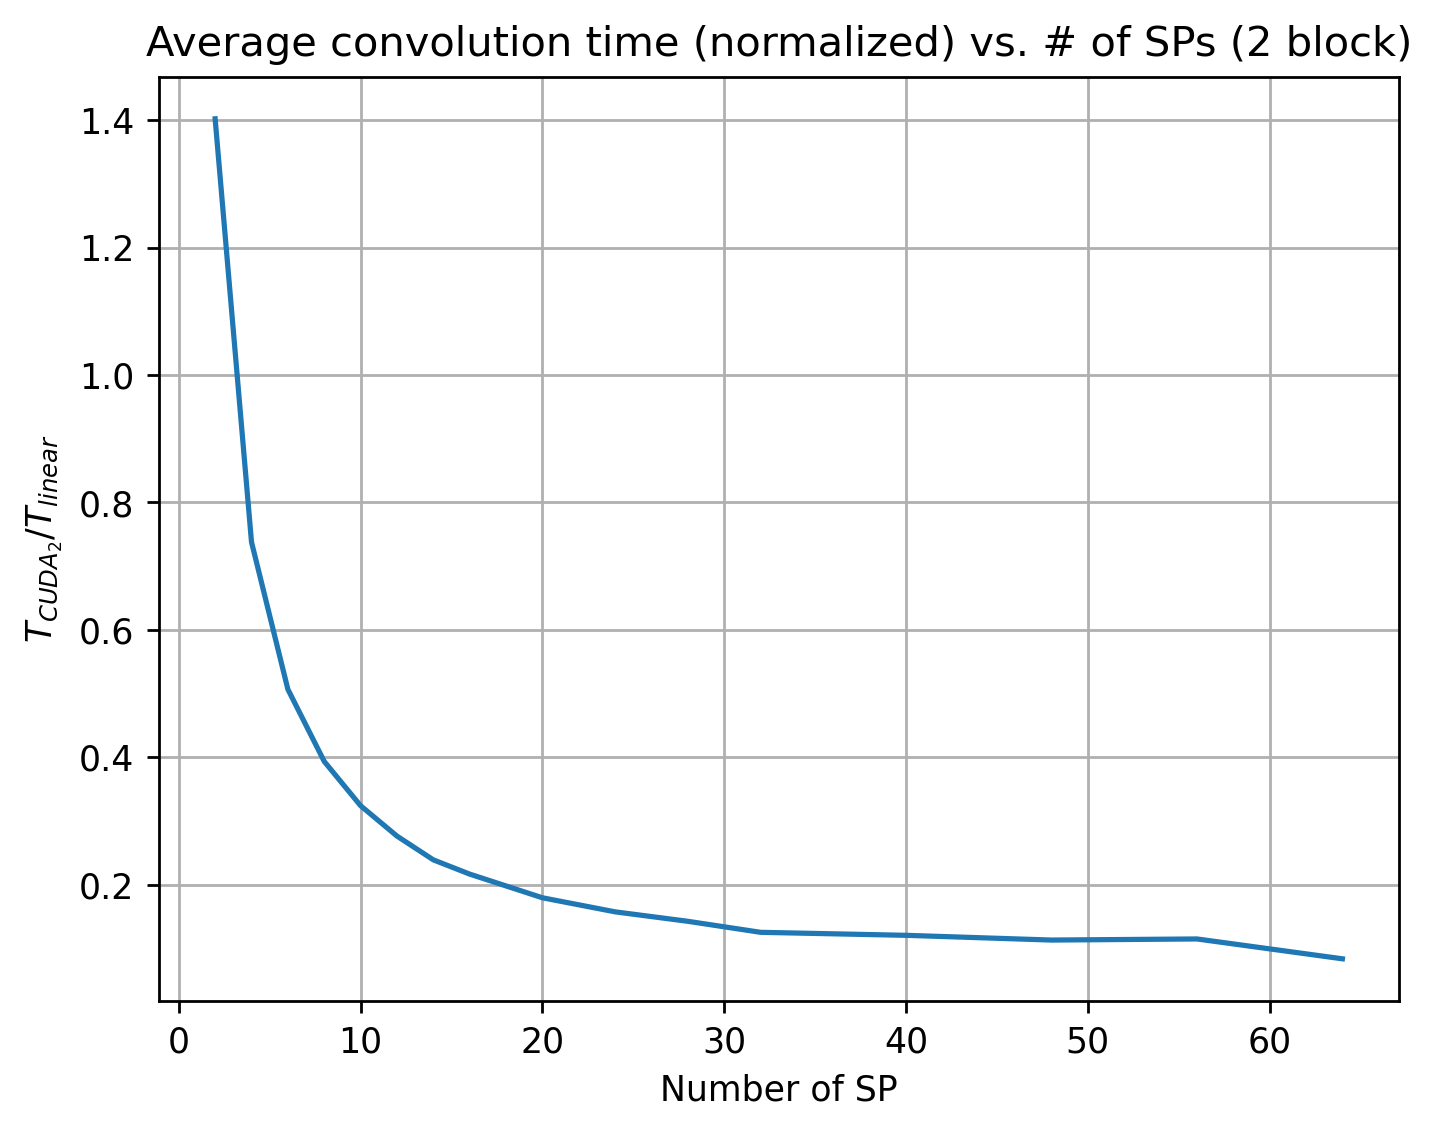

In [32]:
fig3, ax3 = plt.subplots()
fig3.dpi = 250
ax3.plot(thread_num[~np.isnan(cd2blk_imp)], cd2blk_imp[~np.isnan(cd2blk_imp)]/lin_imp)
ax3.grid()
ax3.set_xlabel(r"Number of SP")
ax3.set_ylabel(r"$T_{CUDA_2}/T_{linear}$")
ax3.set_title(r"Average convolution time (normalized) vs. # of SPs (2 block)")

Text(0.5, 1.0, 'Speedup vs. # of SPs (2 block)')

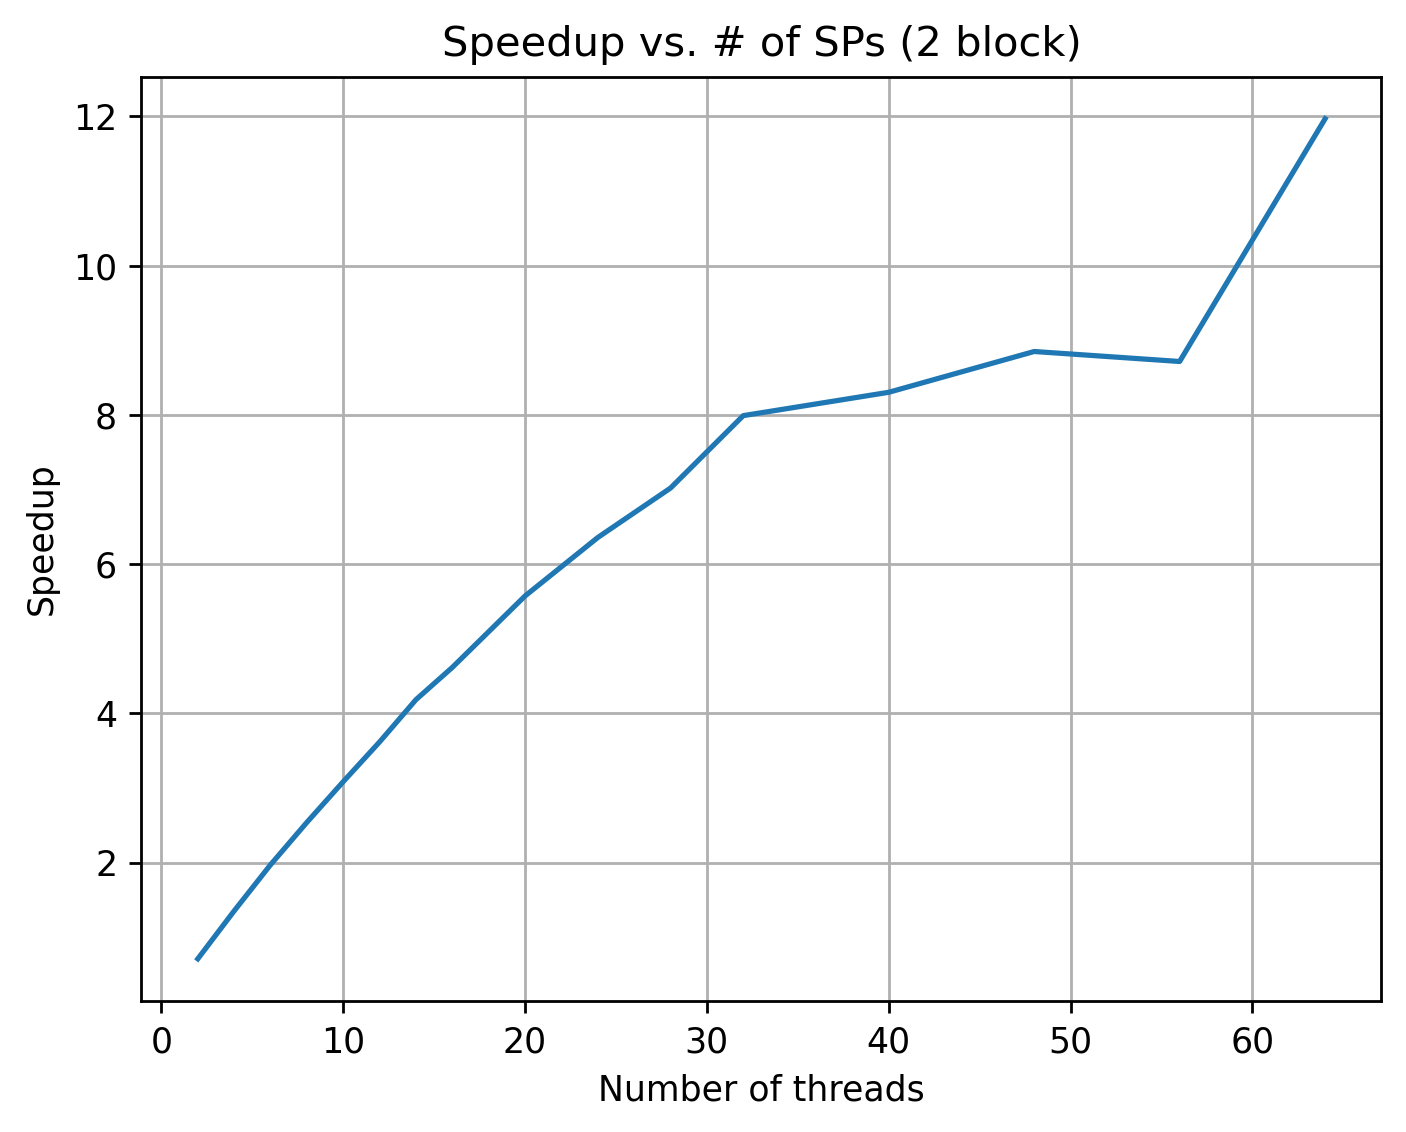

In [25]:
# Speed up
fig0, ax0 = plt.subplots()
fig0.dpi = 250
ax0.plot(thread_num[~np.isnan(cd2blk_imp)], lin_imp/(cd2blk_imp[~np.isnan(cd2blk_imp)]))
ax0.grid()
ax0.set_xlabel(r"Number of threads")
ax0.set_ylabel(r"Speedup")
ax0.set_title(r"Speedup vs. # of SPs (2 block)")

Text(0.5, 1.0, 'Efficiency vs. # of SPs (2 block)')

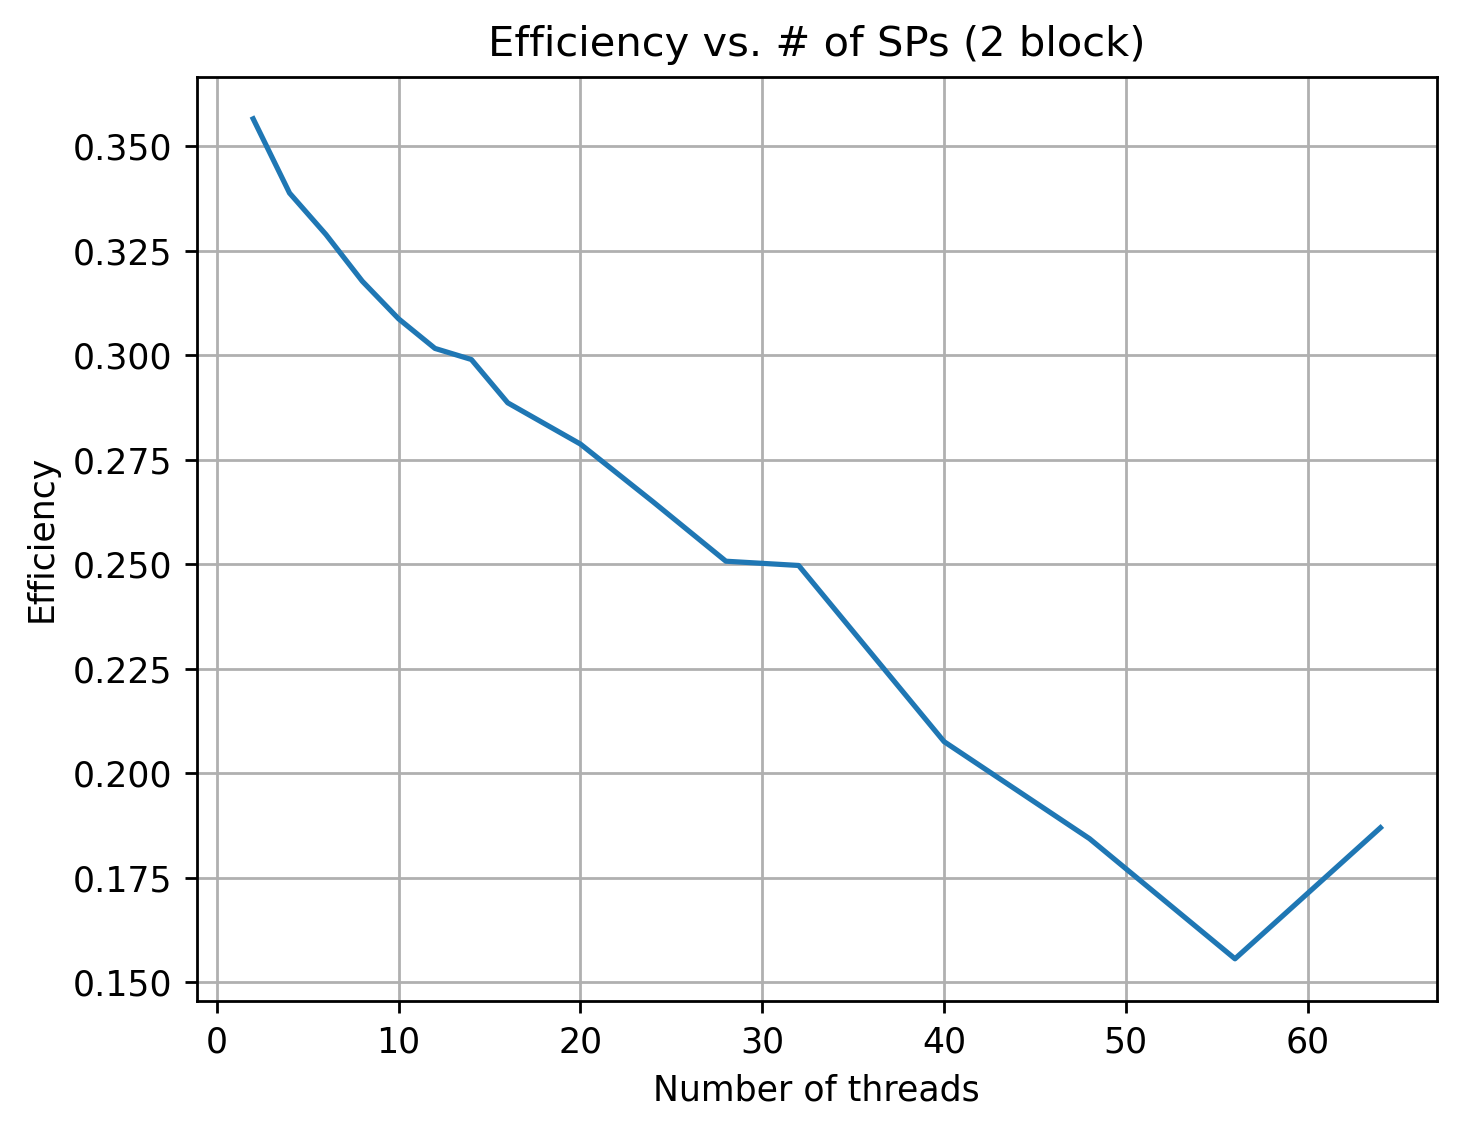

In [27]:
# Efficiency
fig0, ax0 = plt.subplots()
fig0.dpi = 250
ax0.plot(thread_num[~np.isnan(cd2blk_imp)], lin_imp/((cd2blk_imp[~np.isnan(cd2blk_imp)])*thread_num[~np.isnan(cd2blk_imp)]))
ax0.grid()
ax0.set_xlabel(r"Number of threads")
ax0.set_ylabel(r"Efficiency")
ax0.set_title(r"Efficiency vs. # of SPs (2 block)")

Text(0.5, 1.0, 'Average convolution time (normalized) vs. # of SPs (4 block)')

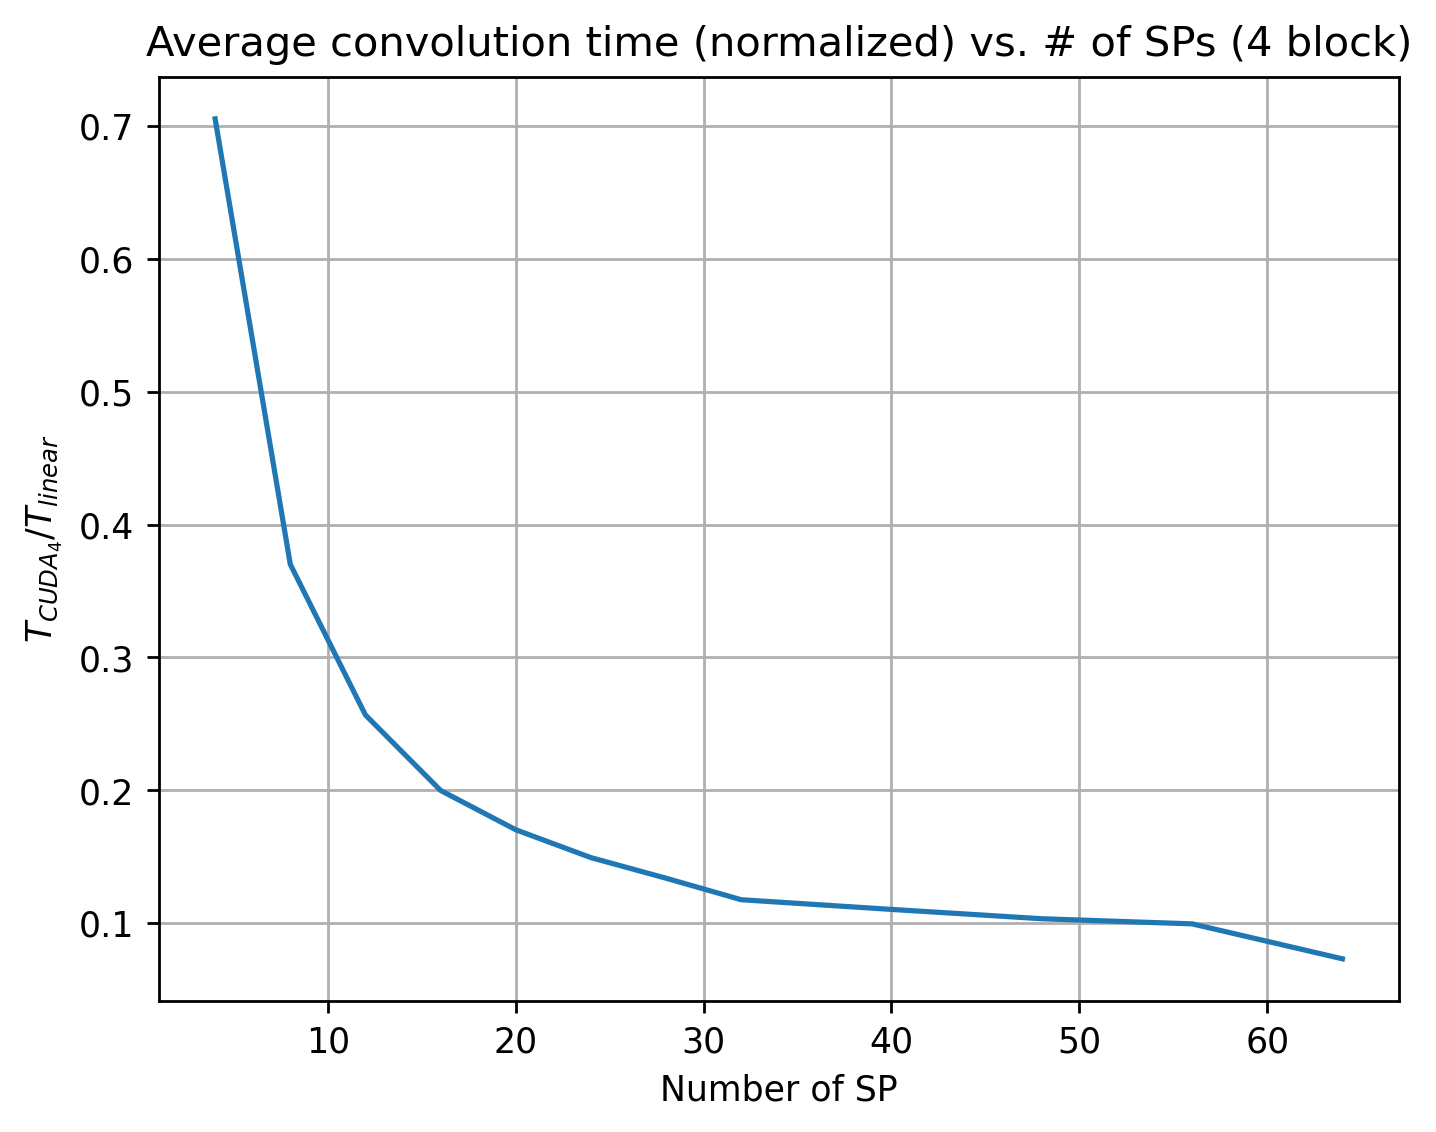

In [36]:
fig4, ax4 = plt.subplots()
fig4.dpi = 250
ax4.plot(thread_num[~np.isnan(cd4blk_imp)], cd4blk_imp[~np.isnan(cd4blk_imp)]/lin_imp)
# ax4.plot(thread_num[~np.isnan(cd4blk_imp)], [lin_imp]*len(cd4blk_imp[~np.isnan(cd4blk_imp)]))
ax4.grid()
ax4.set_xlabel(f"Number of SP")
ax4.set_ylabel(r"$T_{CUDA_4}/T_{linear}$")
ax4.set_title(f"Average convolution time (normalized) vs. # of SPs (4 block)")

Text(0.5, 1.0, 'Speedup vs. # of SPs (4 block)')

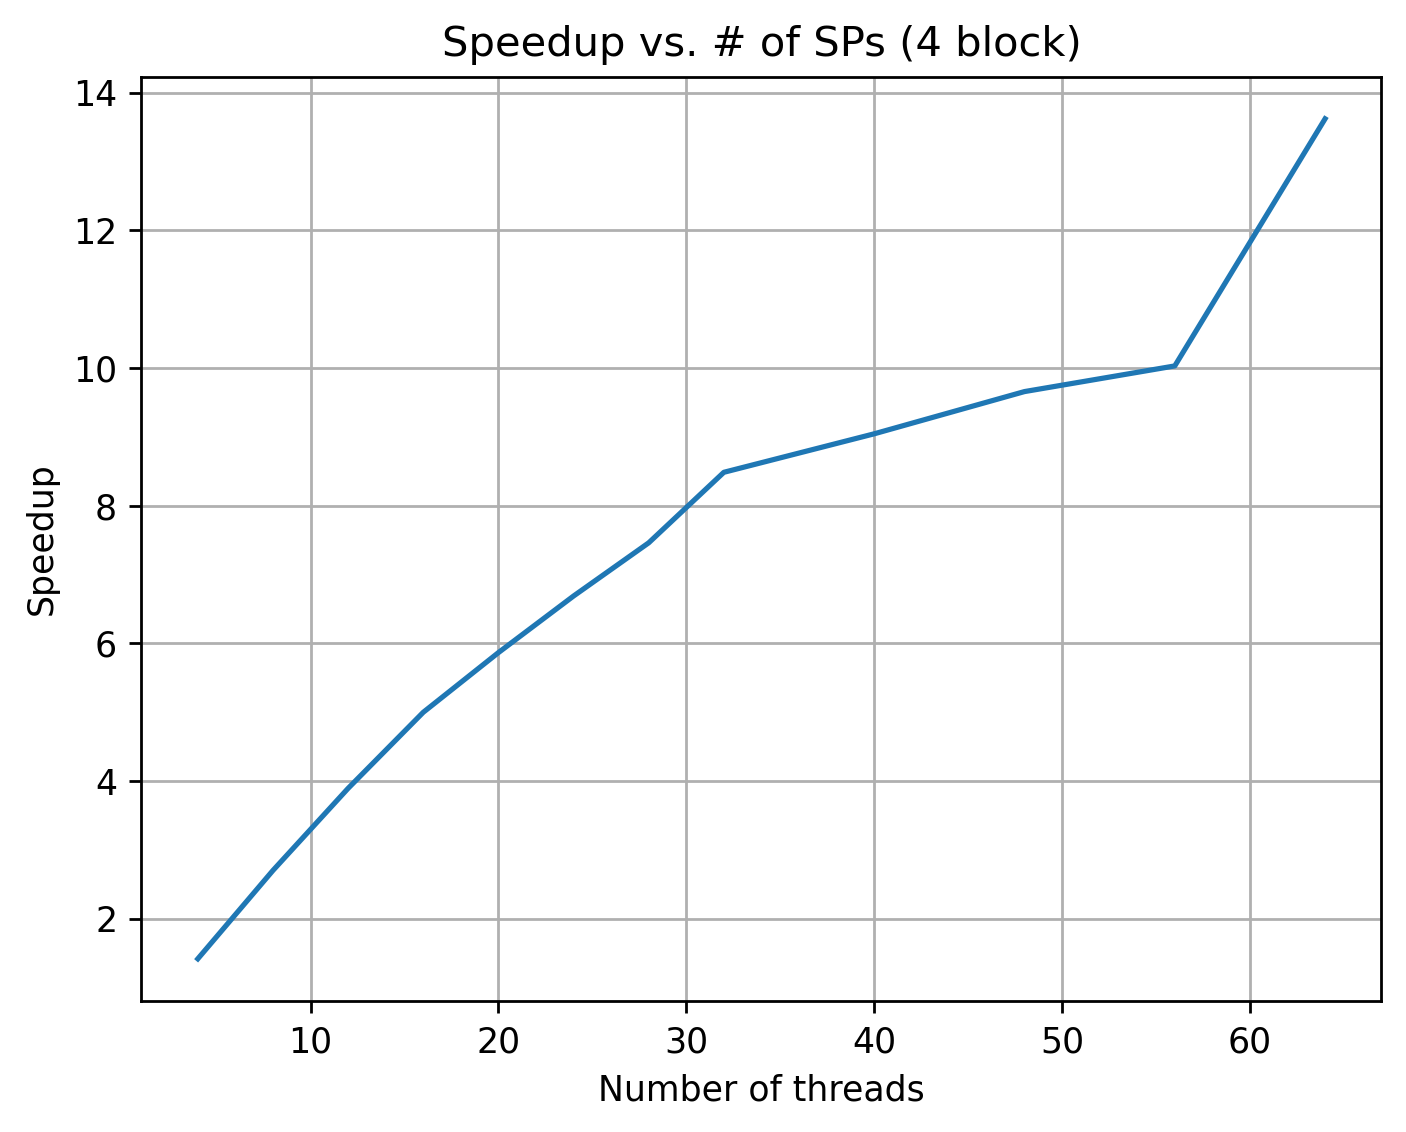

In [28]:
# Speed up
fig0, ax0 = plt.subplots()
fig0.dpi = 250
ax0.plot(thread_num[~np.isnan(cd4blk_imp)], lin_imp/(cd4blk_imp[~np.isnan(cd4blk_imp)]))
ax0.grid()
ax0.set_xlabel(r"Number of threads")
ax0.set_ylabel(r"Speedup")
ax0.set_title(r"Speedup vs. # of SPs (4 block)")

Text(0.5, 1.0, 'Efficiency vs. # of SPs (4 block)')

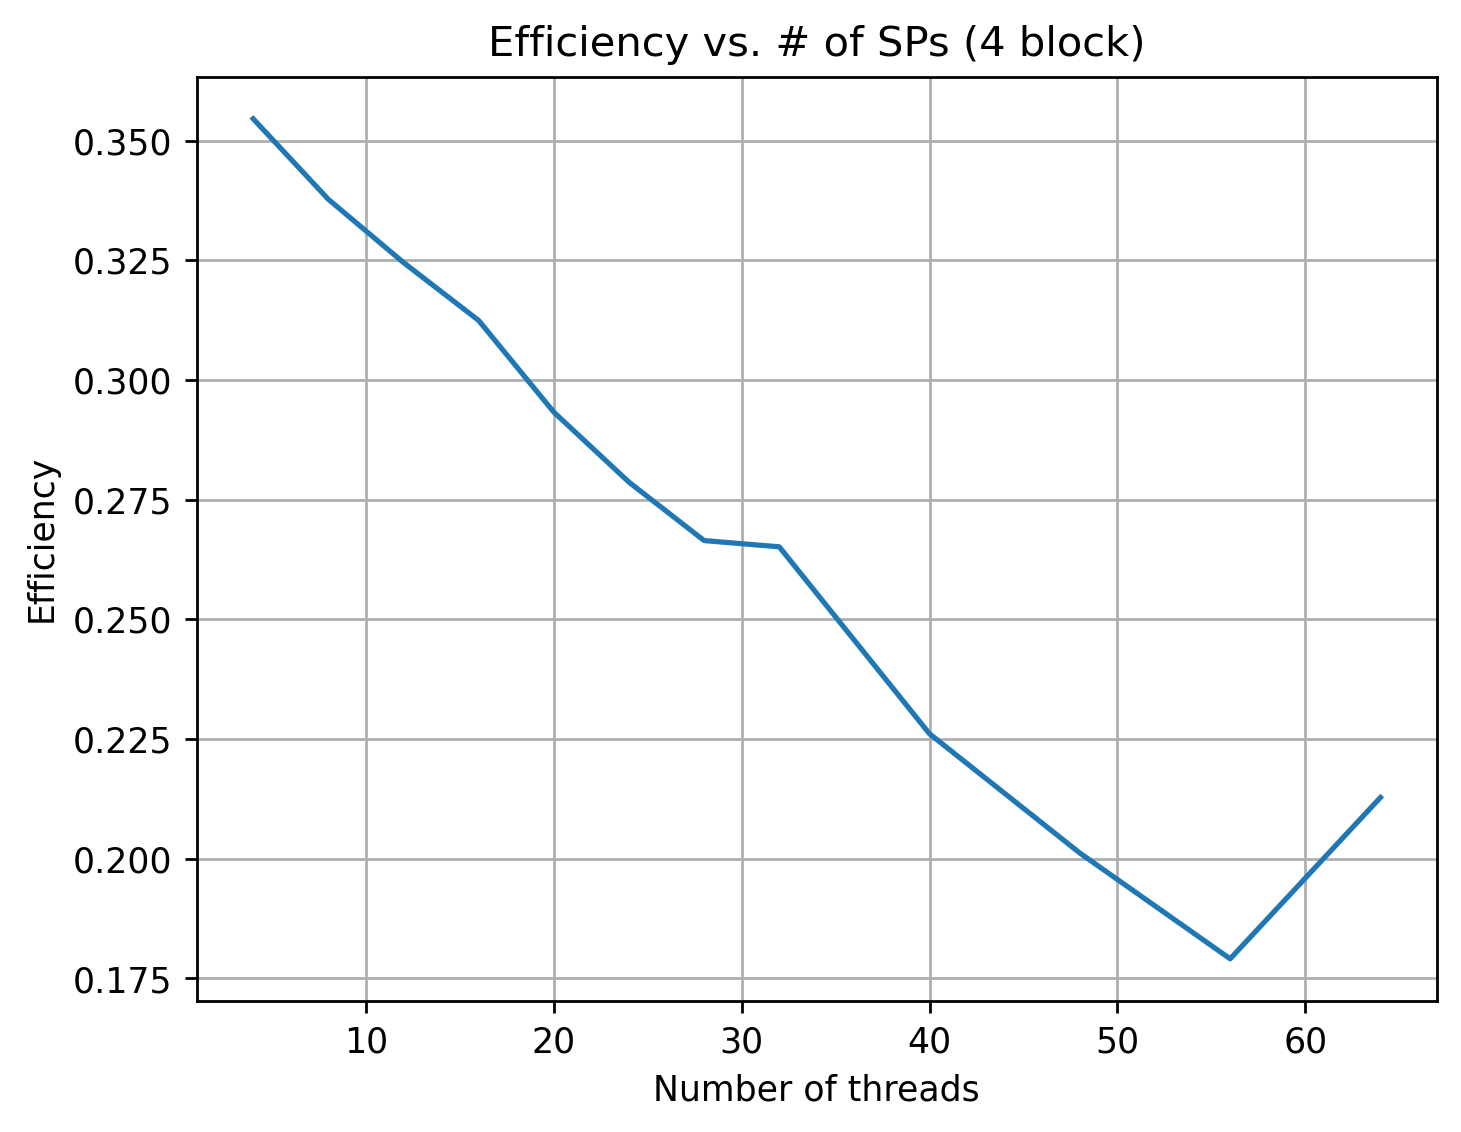

In [30]:
# Efficiency
fig0, ax0 = plt.subplots()
fig0.dpi = 250
ax0.plot(thread_num[~np.isnan(cd4blk_imp)], lin_imp/((cd4blk_imp[~np.isnan(cd4blk_imp)])*thread_num[~np.isnan(cd4blk_imp)]))
ax0.grid()
ax0.set_xlabel(r"Number of threads")
ax0.set_ylabel(r"Efficiency")
ax0.set_title(r"Efficiency vs. # of SPs (4 block)")

Text(0.5, 1.0, 'Average convolution time (normalized) vs. # of SPs (8 block)')

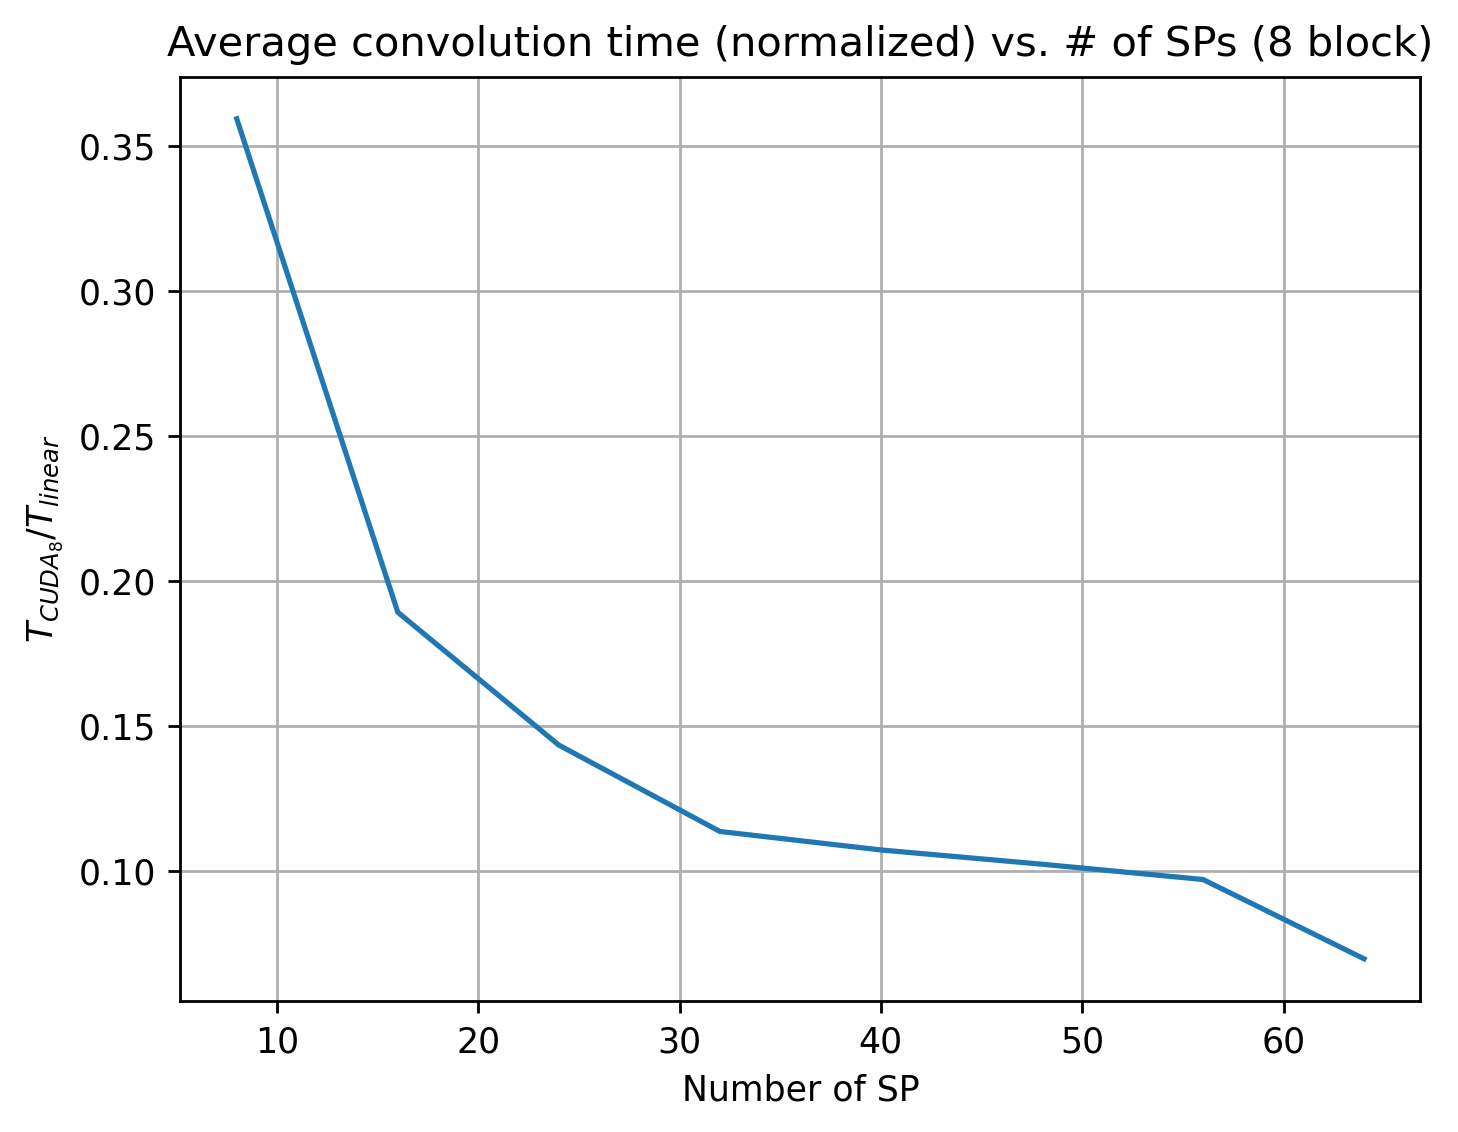

In [38]:
fig5, ax5 = plt.subplots()
fig5.dpi = 250
ax5.plot(thread_num[~np.isnan(cd8blk_imp)], cd8blk_imp[~np.isnan(cd8blk_imp)]/lin_imp)
# ax5.plot(thread_num[~np.isnan(cd8blk_imp)], [lin_imp]*len(cd8blk_imp[~np.isnan(cd8blk_imp)]))
ax5.grid()
ax5.set_xlabel(f"Number of SP")
ax5.set_ylabel(r"$T_{CUDA_8}/T_{linear}$")
ax5.set_title(f"Average convolution time (normalized) vs. # of SPs (8 block)")

Text(0.5, 1.0, 'Speedup vs. # of SPs (8 block)')

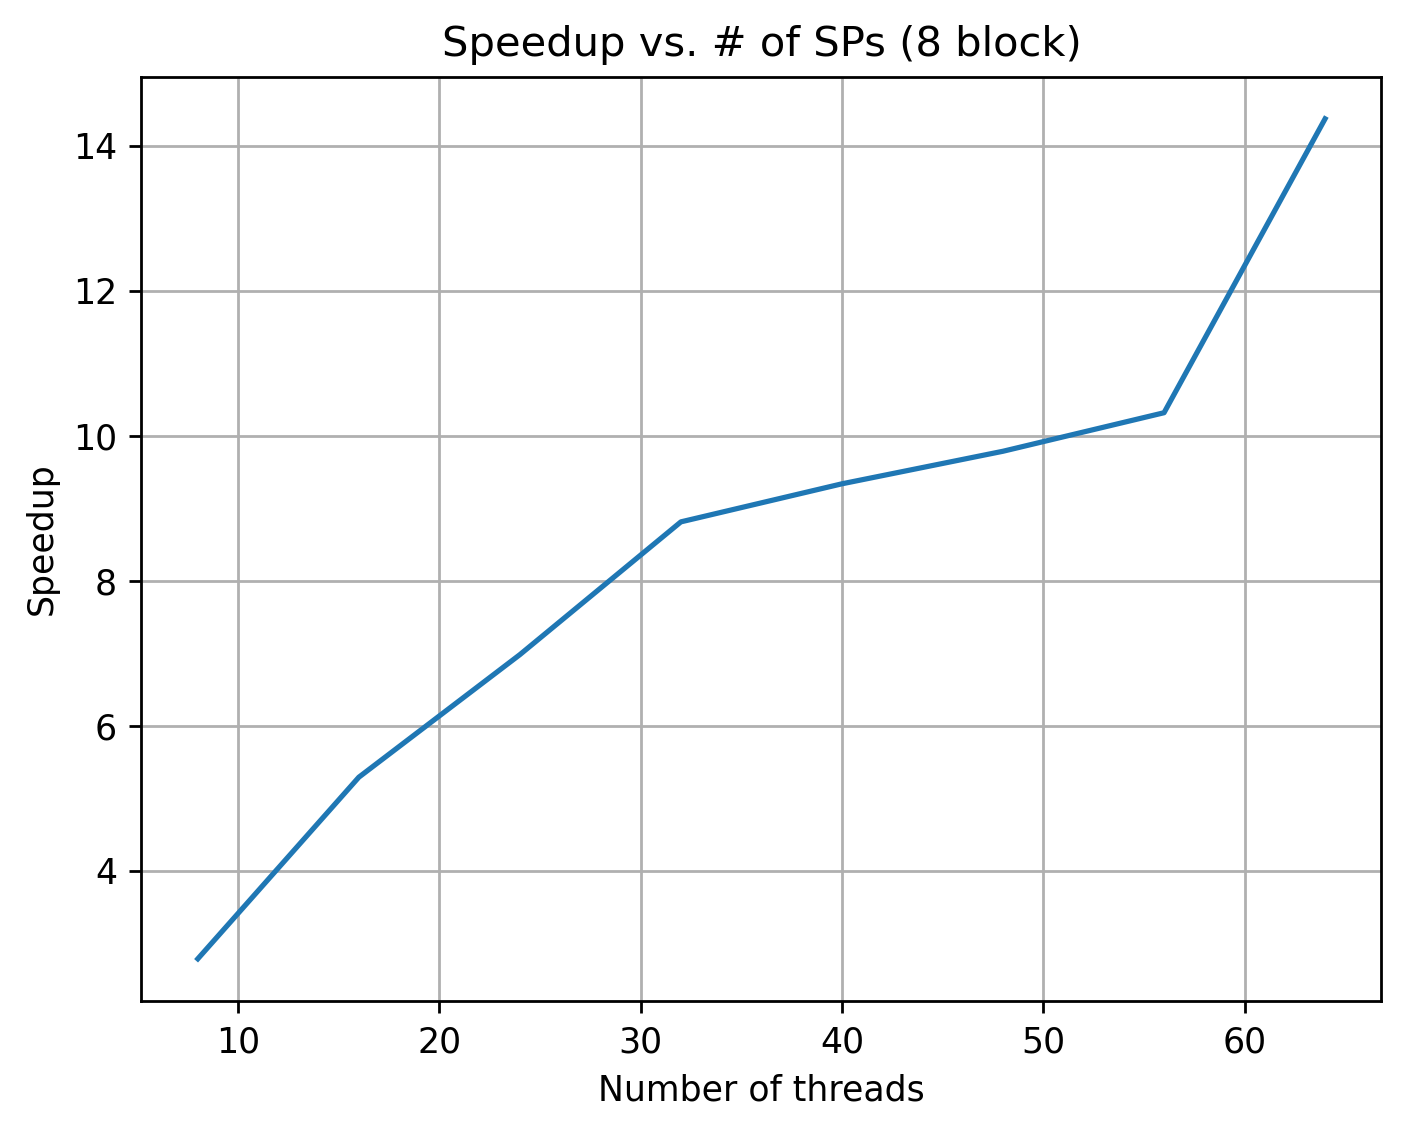

In [31]:
# Speed up
fig0, ax0 = plt.subplots()
fig0.dpi = 250
ax0.plot(thread_num[~np.isnan(cd8blk_imp)], lin_imp/(cd8blk_imp[~np.isnan(cd8blk_imp)]))
ax0.grid()
ax0.set_xlabel(r"Number of threads")
ax0.set_ylabel(r"Speedup")
ax0.set_title(r"Speedup vs. # of SPs (8 block)")

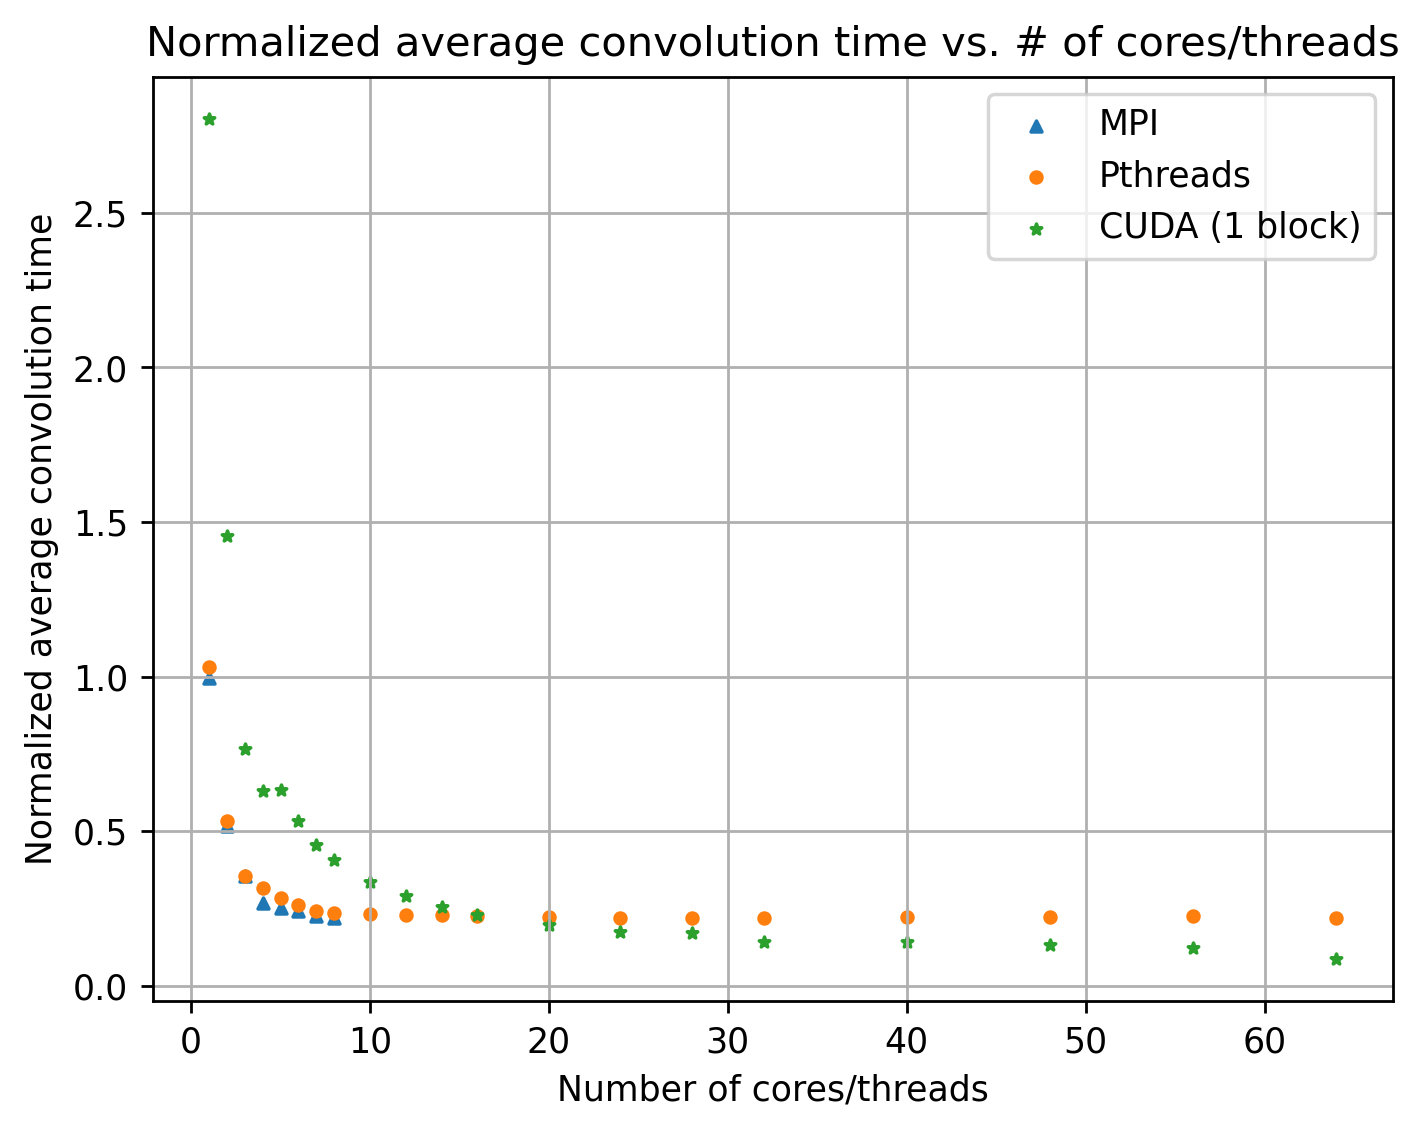

In [44]:
fig6, ax6 = plt.subplots()
fig6.dpi = 250
# ax6.plot(thread_num, [lin_imp] * len(thread_num), label="Linear time")
ax6.scatter(thread_num, MPI_imp/lin_imp, label="MPI", s=10, marker="^")
ax6.scatter(thread_num, pth_imp/lin_imp, label="Pthreads", s=10, marker="o")
ax6.scatter(thread_num, cd1blk_imp/lin_imp, label="CUDA (1 block)", s=10, marker="*")


ax6.set_xlabel("Number of cores/threads")
ax6.set_ylabel("Normalized average convolution time")
ax6.set_title("Normalized average convolution time vs. # of cores/threads")
ax6.legend()
ax6.grid()

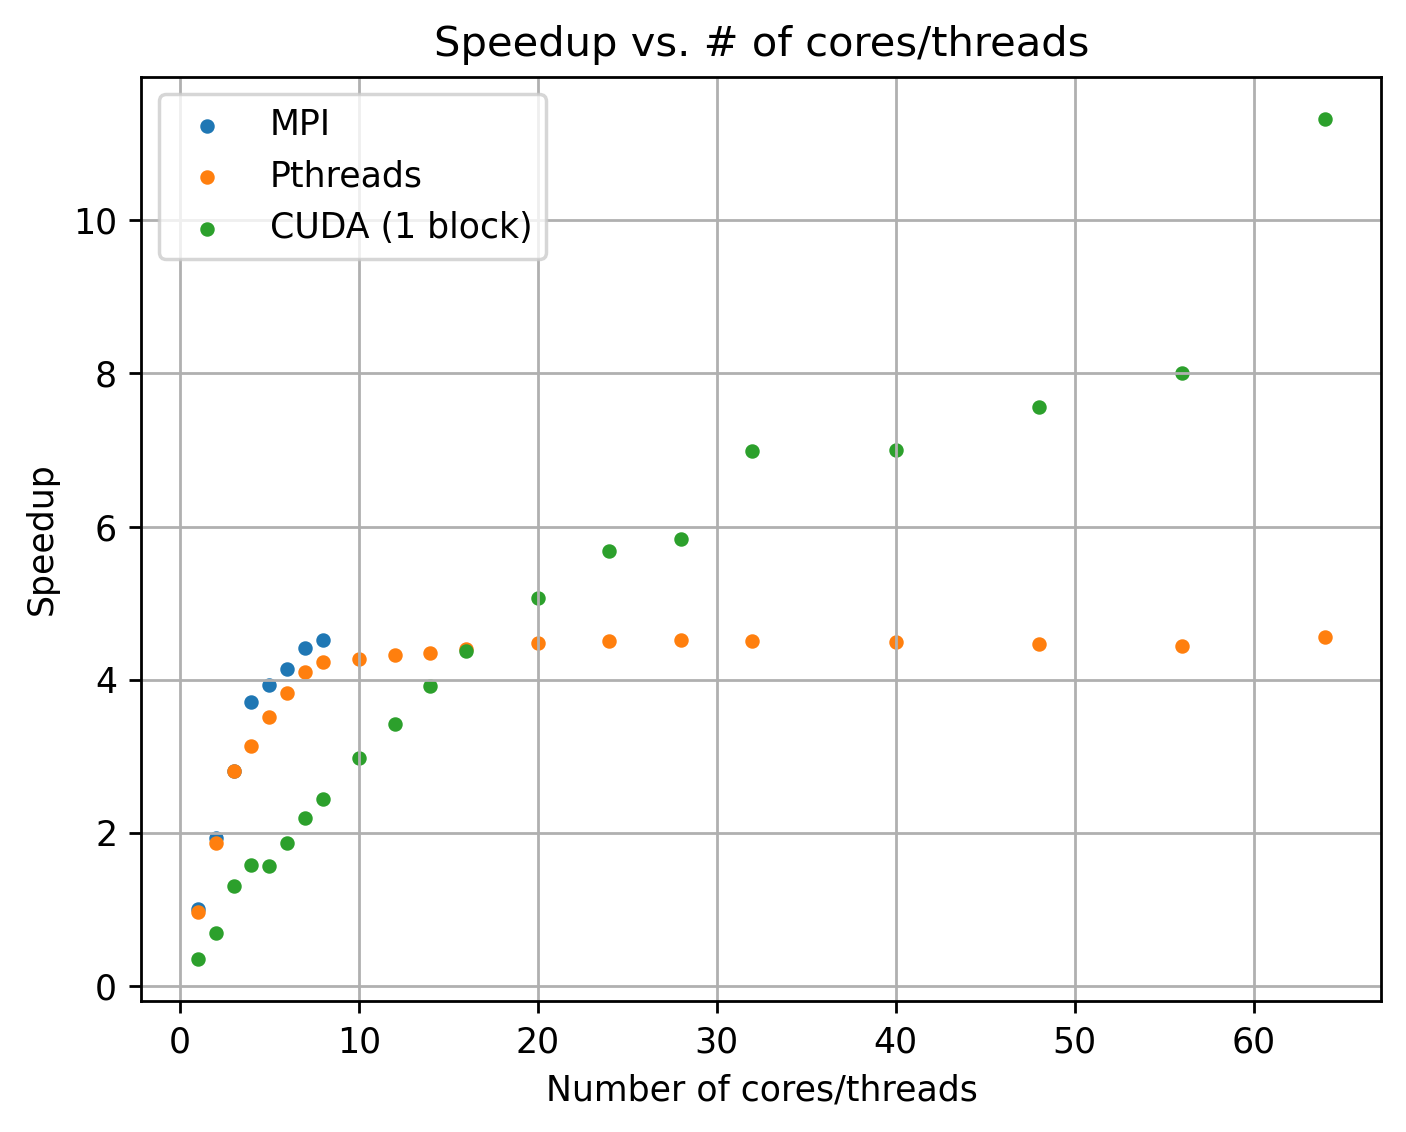

In [42]:
# Speedup
fig6, ax6 = plt.subplots()
fig6.dpi = 250
ax6.scatter(thread_num, lin_imp/MPI_imp, label="MPI", s=10)
ax6.scatter(thread_num, lin_imp/pth_imp, label="Pthreads", s=10)
ax6.scatter(thread_num, lin_imp/cd1blk_imp, label="CUDA (1 block)", s=10)


ax6.set_xlabel("Number of cores/threads")
ax6.set_ylabel("Speedup")
ax6.set_title("Speedup vs. # of cores/threads")
ax6.legend()
ax6.grid()

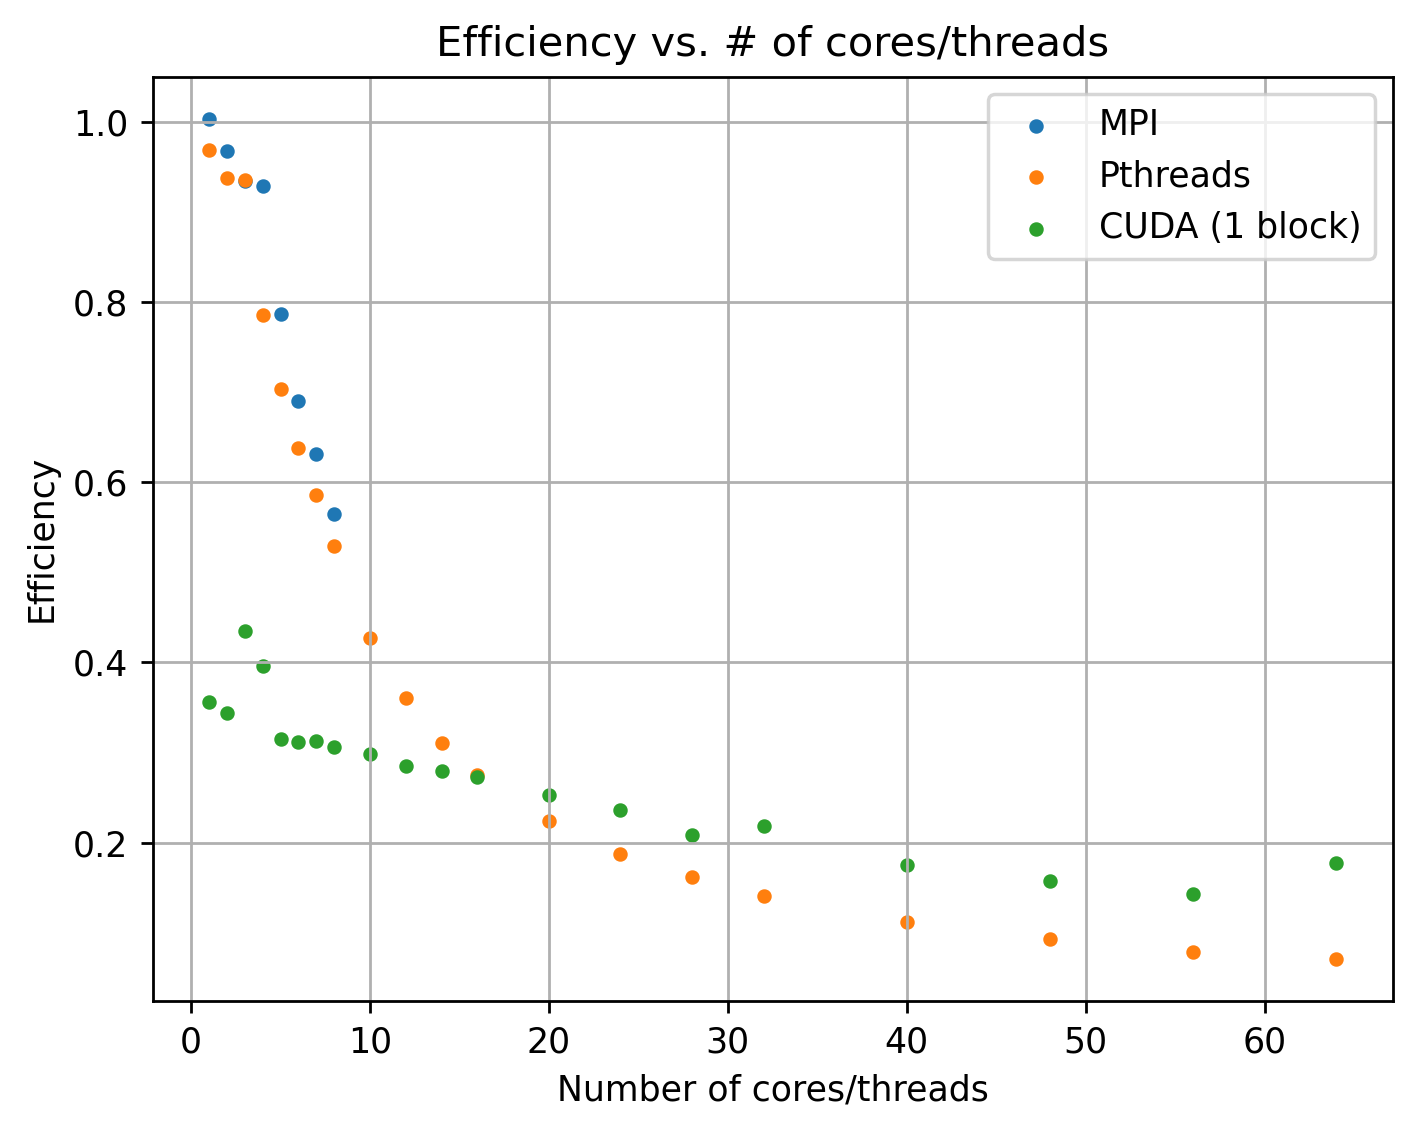

In [41]:
# Efficiency
fig6, ax6 = plt.subplots()
fig6.dpi = 250
ax6.scatter(thread_num, lin_imp/(MPI_imp*thread_num), label="MPI", s=10)
ax6.scatter(thread_num, lin_imp/(pth_imp*thread_num), label="Pthreads", s=10)
ax6.scatter(thread_num, lin_imp/(cd1blk_imp*thread_num), label="CUDA (1 block)", s=10)


ax6.set_xlabel("Number of cores/threads")
ax6.set_ylabel("Efficiency")
ax6.set_title("Efficiency vs. # of cores/threads")
ax6.legend()
ax6.grid()

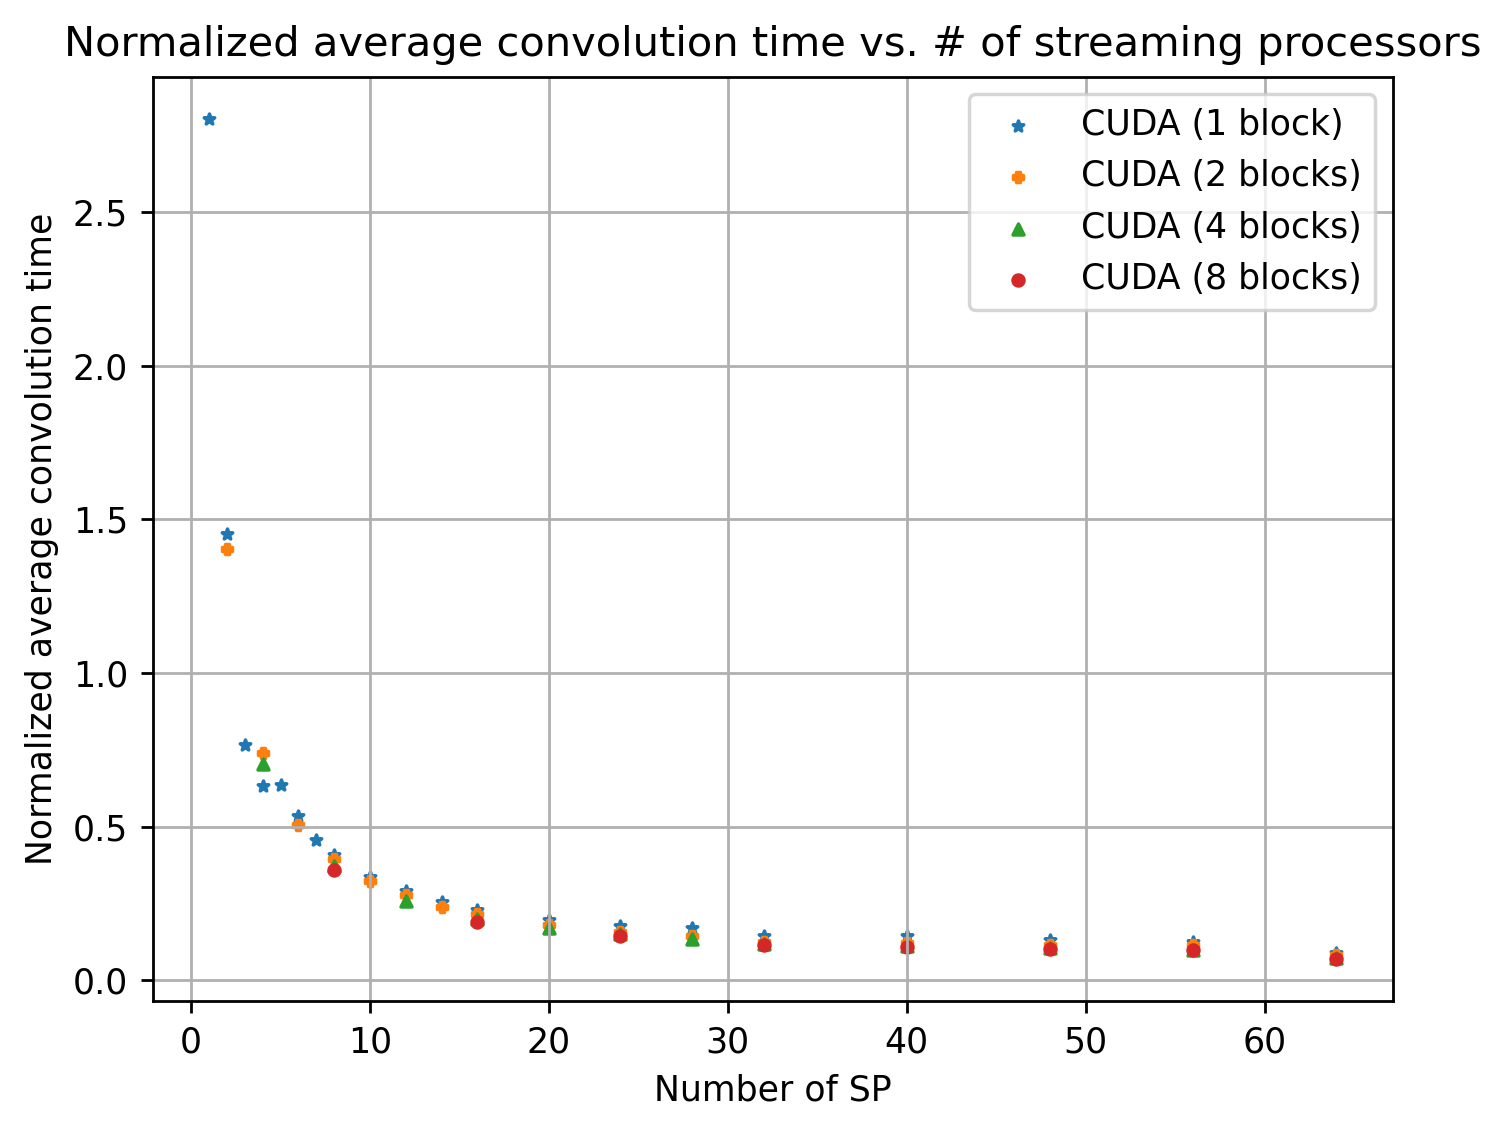

In [45]:
fig7, ax7 = plt.subplots()
fig7.dpi = 250
# ax7.plot(thread_num, [lin_imp] * len(thread_num), label="Linear time")
ax7.scatter(thread_num, cd1blk_imp/lin_imp, label="CUDA (1 block)", s=10, marker="*")
ax7.scatter(thread_num , cd2blk_imp/lin_imp, label="CUDA (2 blocks)", s=10, marker="P")
ax7.scatter(thread_num, cd4blk_imp/lin_imp, label="CUDA (4 blocks)", s=10, marker="^")
ax7.scatter(thread_num, cd8blk_imp/lin_imp, label="CUDA (8 blocks)", s=10, marker="o")


ax7.set_xlabel("Number of SP")
ax7.set_ylabel("Normalized average convolution time")
ax7.set_title("Normalized average convolution time vs. # of streaming processors")
ax7.legend()
ax7.grid()

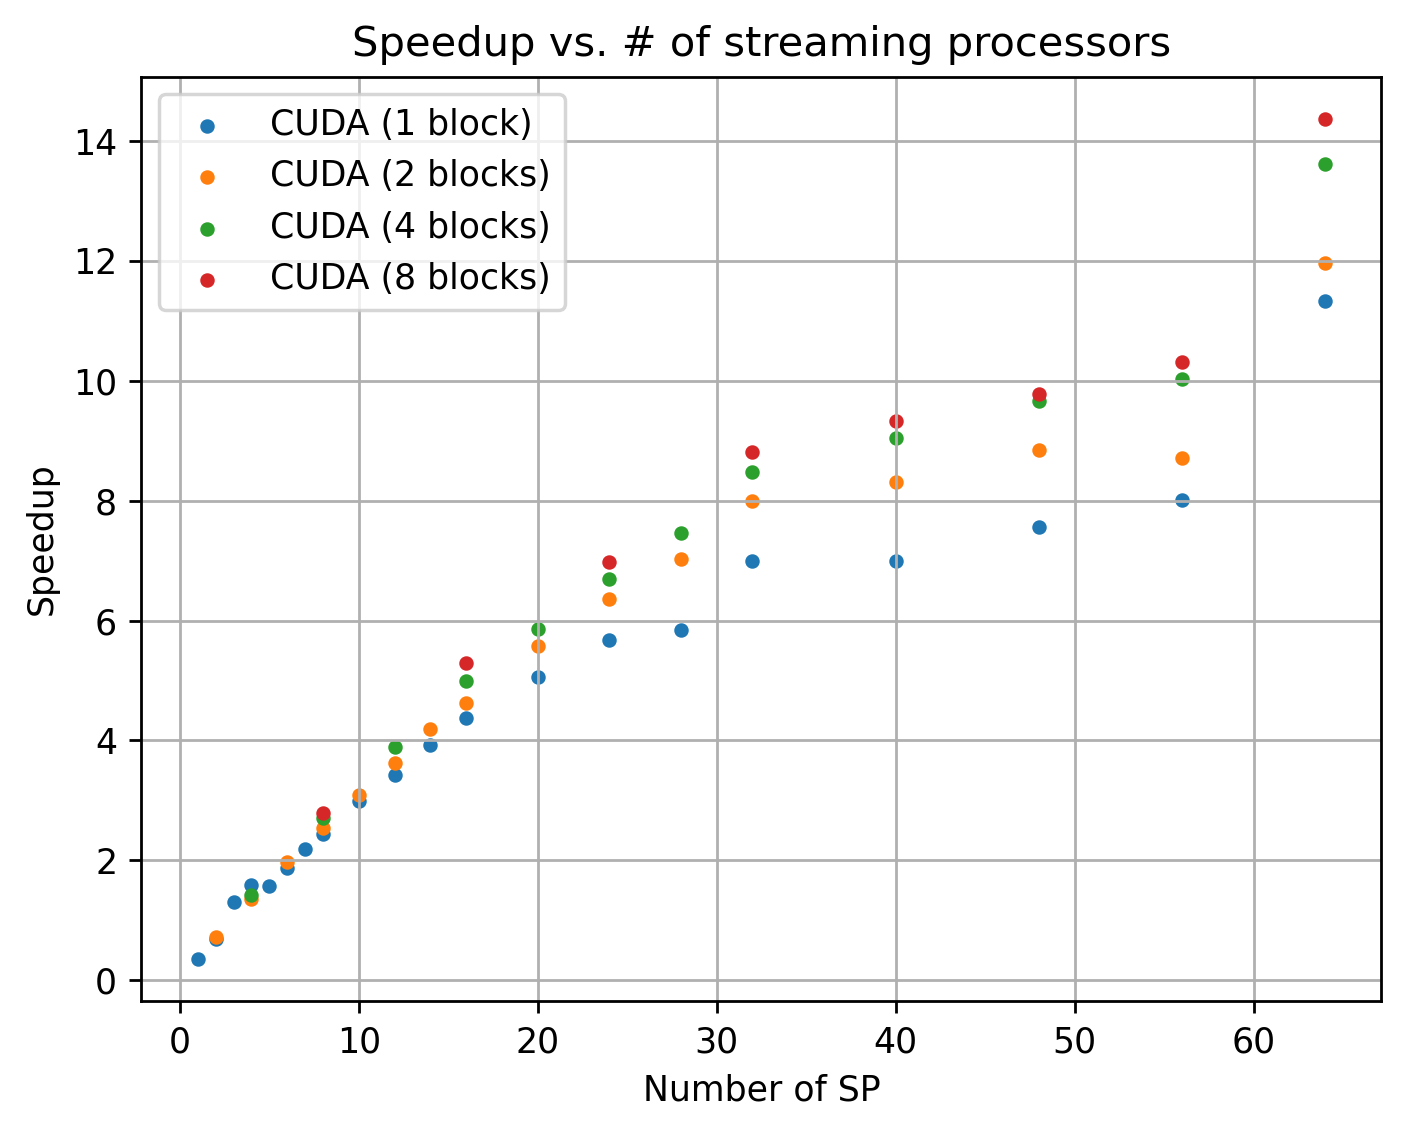

In [43]:
# Speedup
fig7, ax7 = plt.subplots()
fig7.dpi = 250
ax7.scatter(thread_num, lin_imp/cd1blk_imp, label="CUDA (1 block)", s=10)
ax7.scatter(thread_num , lin_imp/cd2blk_imp, label="CUDA (2 blocks)", s=10)
ax7.scatter(thread_num, lin_imp/cd4blk_imp, label="CUDA (4 blocks)", s=10)
ax7.scatter(thread_num, lin_imp/cd8blk_imp, label="CUDA (8 blocks)", s=10)

ax7.set_xlabel("Number of SP")
ax7.set_ylabel("Speedup")
ax7.set_title("Speedup vs. # of streaming processors")
ax7.legend()
ax7.grid()

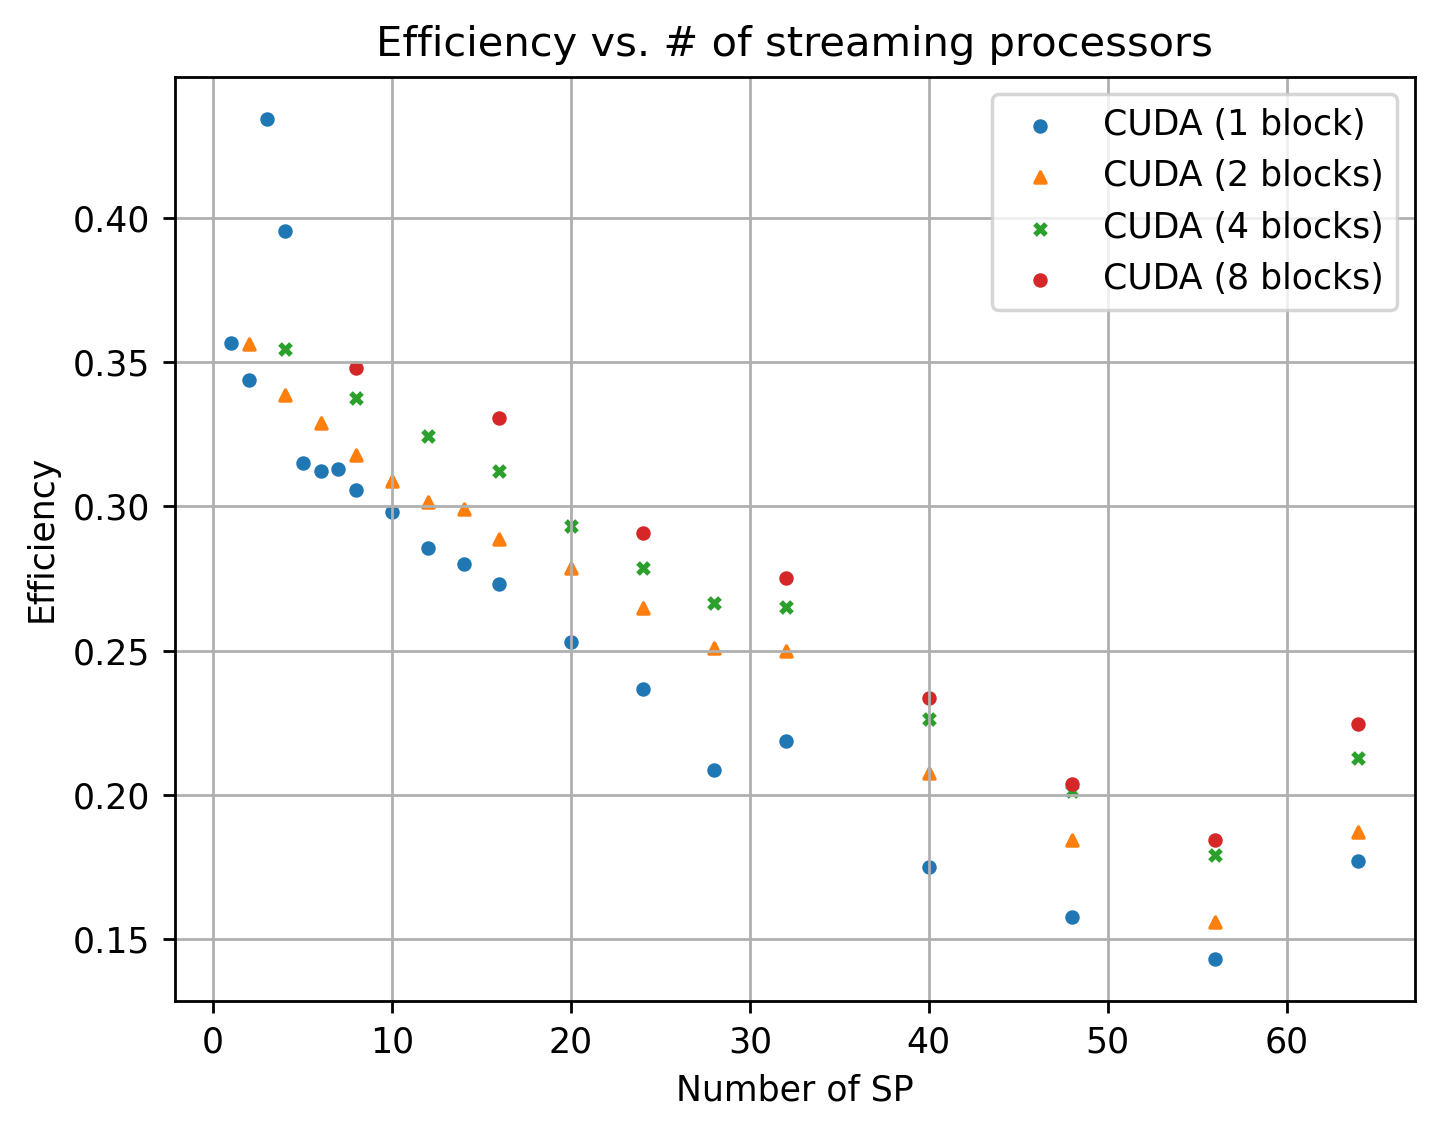

In [46]:
# Efficiency
fig7, ax7 = plt.subplots()
fig7.dpi = 250
ax7.scatter(thread_num, lin_imp/(cd1blk_imp * thread_num), label="CUDA (1 block)", s=10, marker='o')
ax7.scatter(thread_num , lin_imp/(cd2blk_imp * thread_num), label="CUDA (2 blocks)", s=10, marker='^')
ax7.scatter(thread_num, lin_imp/(cd4blk_imp * thread_num), label="CUDA (4 blocks)", s=10, marker='x')
ax7.scatter(thread_num, lin_imp/(cd8blk_imp * thread_num), label="CUDA (8 blocks)", s=10)

ax7.set_xlabel("Number of SP")
ax7.set_ylabel("Efficiency")
ax7.set_title("Efficiency vs. # of streaming processors")
ax7.legend()
ax7.grid()

## Secondary Graphs

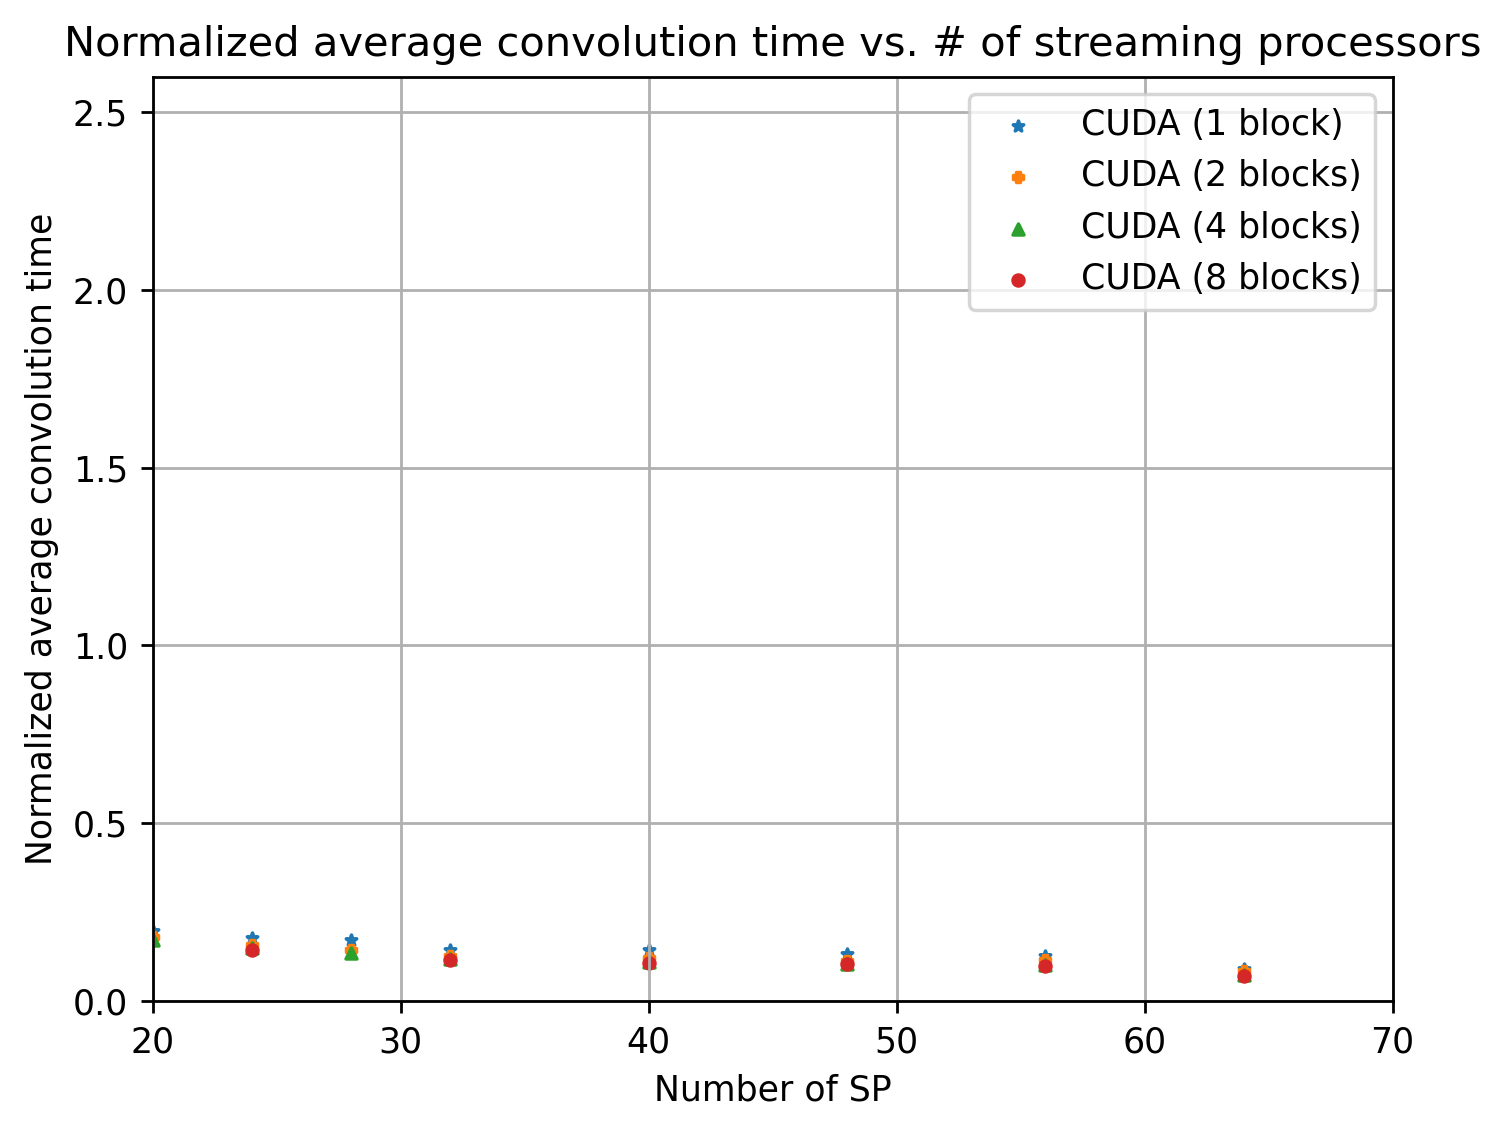

In [46]:
fig8, ax8 = plt.subplots()
fig8.dpi = 250
# ax7.plot(thread_num, [lin_imp] * len(thread_num), label="Linear time")
ax8.scatter(thread_num, cd1blk_imp/lin_imp, label="CUDA (1 block)", s=10, marker="*")
ax8.scatter(thread_num , cd2blk_imp/lin_imp, label="CUDA (2 blocks)", s=10, marker="P")
ax8.scatter(thread_num, cd4blk_imp/lin_imp, label="CUDA (4 blocks)", s=10, marker="^")
ax8.scatter(thread_num, cd8blk_imp/lin_imp, label="CUDA (8 blocks)", s=10, marker="o")

ax8.set_xlim(20,70)
ax8.set_ylim(0,2.6)
ax8.set_xlabel("Number of SP")
ax8.set_ylabel("Normalized average convolution time")
ax8.set_title("Normalized average convolution time vs. # of streaming processors")
ax8.legend()
ax8.grid()

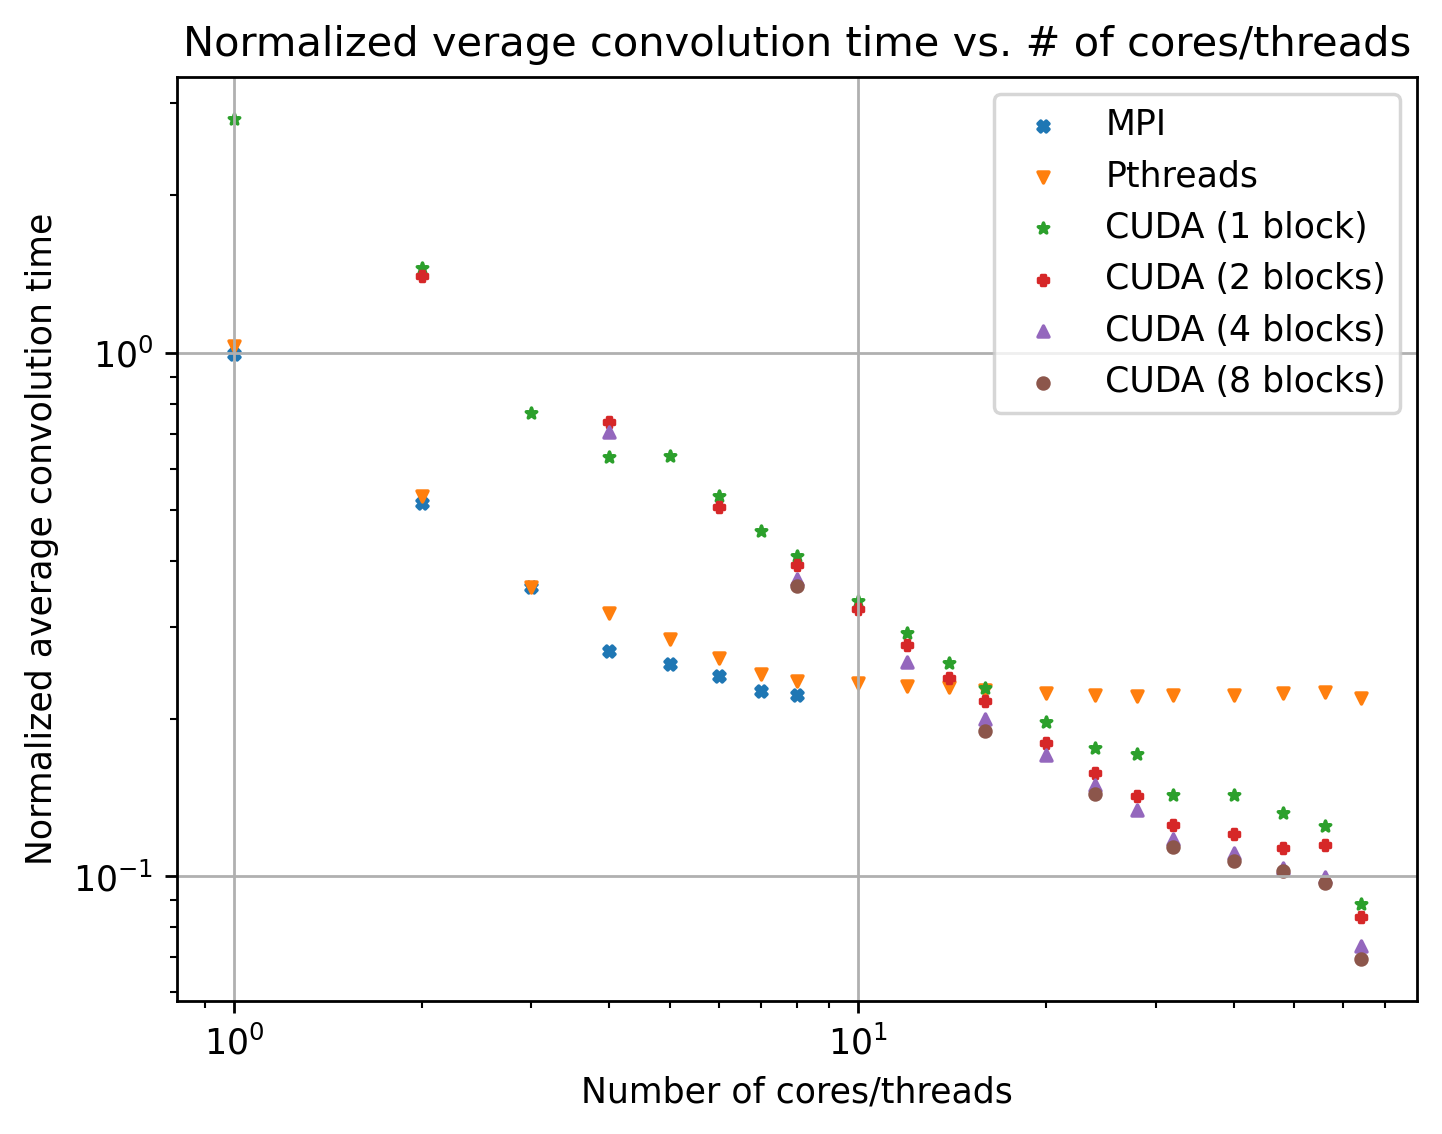

In [47]:
fig9, ax9 = plt.subplots()
fig9.dpi = 250
# ax9.plot(thread_num, [lin_imp] * len(thread_num), label="Linear time")

ax9.scatter(thread_num, MPI_imp/lin_imp, label="MPI", s=10, marker="X")
ax9.scatter(thread_num, pth_imp/lin_imp, label="Pthreads", s=10, marker="v")
ax9.scatter(thread_num, cd1blk_imp/lin_imp, label="CUDA (1 block)", s=10, marker="*")
ax9.scatter(thread_num, cd2blk_imp/lin_imp, label="CUDA (2 blocks)", s=10, marker="P")
ax9.scatter(thread_num, cd4blk_imp/lin_imp, label="CUDA (4 blocks)", s=10, marker="^")
ax9.scatter(thread_num, cd8blk_imp/lin_imp, label="CUDA (8 blocks)", s=10, marker="o")

ax9.set_xlabel("Number of cores/threads")
ax9.set_xscale("log")
ax9.set_ylabel("Normalized average convolution time")
ax9.set_yscale("log")
ax9.set_title("Normalized average convolution time vs. # of cores/threads")
ax9.minorticks_on()
ax9.legend(loc="upper right")
ax9.grid()